# Feature Engineering

The main objectives of this notebook are:
- Extract meaningful features from coffee review text that can predict and explain coffee ratings.
- Investigate relationships between text features and coffee quality indicators.
- Create a reproducible feature engineering pipeline for coffee review analysis.

# 1. Imports and Data Loading

This section sets up the environment and loads the preprocessed coffee review data. The preprocessed data contains engineered features such as embeddings, topics, and sentiment scores.

### Dataset Overview
We are working with a coffee review dataset containing descriptive text, sensory attributes, and other metadata for coffee reviews.

- **Embeddings**: Numerical representations of review text.
- **Topics**: Features derived from topic modeling (LDA and NMF).
- **Sentiment**: Positive and negative sentiment scores extracted from review text.

### **Dataset Characteristics**
- **Number of Reviews**: 2322
- **Sample Review Texts**:
  - **processed_desc_1**:
    > High-toned, crisply sweet. Date, cashew butter, magnolia, grapefruit zest, cedar aroma cup. Sweetly tart structure brisk acidity; full, velvety mouthfeel. Resonant finish lead note date magnolia short, rounding cashew butter grapefruit zest long.
  - **processed_desc_2**:
    > Produced Luis Alberto Montoya Finca Arboleda entirely tree Caturra variety Arabica. Wet-processed “washed” coffee, meaning fruit skin pulp removed bean immediately harvesting drying. Temple Coffee quality-focused retail wholesale specialty roaster active Sacramento, California since. Committed sourcing, roasting brewing finest coffee, Temple feature coffee distinguished single estate cooperative around world. Visit www.templecoffee.com call -- information.
  - **processed_desc_3**:
    > Vivacious, sweetly tart Colombia redolent note rich nut butter citrus zest. Explore similar coffees. Click review Temple Coffee Tea. Click information coffee Colombia. Visit Temple Coffee Tea.

Now that the data is loaded, we can proceed with feature extraction and analysis.

In [1]:
# Imports
import sys
from pathlib import Path
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Polars to use maximum CPU capacity
pl.Config.set_tbl_rows(10_000)  # Adjust table display row limit

# Add project root to Python path
project_root = Path().absolute().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from src.utils.feature_engineering import load_coffee_data, CoffeeFeatureEngineering

# Configure visualizations
sns.set(style="whitegrid")
plt.rcParams.update({"figure.figsize": (10, 6)})

# Define paths
data_dir = project_root / "data"
output_dir = data_dir / "processed"

output_paths = {
    "embeddings": output_dir / "embeddings.parquet",
    "topic_modeling": output_dir / "topic_modeling.parquet",
    "sentiment": output_dir / "sentiment.parquet",
}

# Load preprocessed coffee review data
try:
    df_embeddings, df_topic, df_sentiment = load_coffee_data(
        output_paths["embeddings"],
        output_paths["topic_modeling"],
        output_paths["sentiment"]
    )

    # Dataset Information
    print("\n--- Dataset Information ---")
    print(f"Number of reviews (Embeddings): {len(df_embeddings)}")
    print(f"Number of reviews (Topic Modeling): {len(df_topic)}")
    print(f"Number of reviews (Sentiment): {len(df_sentiment)}\n")

    # Display a few rows from each dataset to verify loading
    print("--- Sample Data from Sentiment Dataset ---")
    display(df_sentiment.head())

    print("\n--- Sample Data from Embeddings Dataset ---")
    display(df_embeddings.head())

    print("\n--- Sample Data from Topic Modeling Dataset ---")
    display(df_topic.head())

except FileNotFoundError as e:
    print("Error: One or more files could not be found. Please ensure the following files exist:")
    print(f" - {output_paths['embeddings']}")
    print(f" - {output_paths['topic_modeling']}")
    print(f" - {output_paths['sentiment']}")
    print("Details:")
    print(e)

/opt/miniconda3/envs/tf_env_dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading preprocessed coffee review data...

--- Dataset Information ---
Number of reviews (Embeddings): 2322
Number of reviews (Topic Modeling): 2322
Number of reviews (Sentiment): 2322

--- Sample Data from Sentiment Dataset ---


shape: (5, 20)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ rating ┆ roaster    ┆ roast      ┆ est_price ┆ … ┆ roast_by_ ┆ processed ┆ processed ┆ processed │
│ ---    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ agtron    ┆ _desc_1   ┆ _desc_2   ┆ _desc_3   │
│ i64    ┆ str        ┆ str        ┆ str       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│        ┆            ┆            ┆           ┆   ┆ str       ┆ str       ┆ str       ┆ str       │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 92     ┆ Temple     ┆ Medium-Lig ┆ $18.50/12 ┆ … ┆ Medium    ┆ high-tone ┆ produced  ┆ vivacious │
│        ┆ Coffee and ┆ ht         ┆ ounces    ┆   ┆           ┆ d ,       ┆ luis      ┆ , sweetly │
│        ┆ Tea        ┆            ┆           ┆   ┆           ┆ crisply   ┆ alberto   ┆ tart      │
│        ┆            ┆            ┆           ┆   ┆           ┆ sweet .   ┆ montoya … ┆ colom…    │
│        ┆            ┆            ┆           ┆   ┆           ┆ d…        ┆           ┆           │
│ 92     ┆ Oceana     ┆ Medium-Lig ┆ $22.00/12 ┆ … ┆ Medium    ┆ richly    ┆ produced  ┆ fruit-for │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆           ┆ sweet ,   ┆ danilo    ┆ ward      │
│        ┆            ┆            ┆           ┆   ┆           ┆ fruit-ton ┆ salazar   ┆ costa     │
│        ┆            ┆            ┆           ┆   ┆           ┆ ed . s…   ┆ aria f…   ┆ rica cup  │
│        ┆            ┆            ┆           ┆   ┆           ┆           ┆           ┆ t…        │
│ 96     ┆ Dragonfly  ┆ Medium-Lig ┆ $75.00/8  ┆ … ┆ Medium-Li ┆ rich-tone ┆ exception ┆ harmoniou │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆ ght       ┆ d ,       ┆ al coffee ┆ s ,       │
│        ┆ Roasters   ┆            ┆           ┆   ┆           ┆ cleanly   ┆ wa        ┆ refined , │
│        ┆            ┆            ┆           ┆   ┆           ┆ fruit-for ┆ selected… ┆ exquisi…  │
│        ┆            ┆            ┆           ┆   ┆           ┆ …         ┆           ┆           │
│ 93     ┆ Caffeic    ┆ Medium-Lig ┆ $13.50/12 ┆ … ┆ Medium-Li ┆ crisply   ┆ coffee    ┆ sweetly   │
│        ┆            ┆ ht         ┆ ounces    ┆   ┆ ght       ┆ sweet ,   ┆ tied thir ┆ fruit-for │
│        ┆            ┆            ┆           ┆   ┆           ┆ fruit-ton ┆ d-highest ┆ ward      │
│        ┆            ┆            ┆           ┆   ┆           ┆ ed . …    ┆ rati…     ┆ natural-… │
│ 96     ┆ Dragonfly  ┆ Medium-Lig ┆ $45.00/8  ┆ … ┆ Medium-Li ┆ crisp ,   ┆ produced  ┆ tropical  │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆ ght       ┆ elegantly ┆ tree rare ┆ fruit-    │
│        ┆ Roasters   ┆            ┆           ┆   ┆           ┆ sweet ,   ┆ ethiopia- ┆ spice-ton │
│        ┆            ┆            ┆           ┆   ┆           ┆ rich…     ┆ de…       ┆ ed ar…    │
└────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘


--- Sample Data from Embeddings Dataset ---


shape: (5, 20)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ rating ┆ roaster    ┆ roast      ┆ est_price ┆ … ┆ roast_by_ ┆ processed ┆ processed ┆ processed │
│ ---    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ agtron    ┆ _desc_1   ┆ _desc_2   ┆ _desc_3   │
│ i64    ┆ str        ┆ str        ┆ str       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│        ┆            ┆            ┆           ┆   ┆ str       ┆ str       ┆ str       ┆ str       │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 92     ┆ Temple     ┆ Medium-Lig ┆ $18.50/12 ┆ … ┆ Medium    ┆ high-tone ┆ produced  ┆ vivacious │
│        ┆ Coffee and ┆ ht         ┆ ounces    ┆   ┆           ┆ d ,       ┆ luis      ┆ , sweetly │
│        ┆ Tea        ┆            ┆           ┆   ┆           ┆ crisply   ┆ alberto   ┆ tart      │
│        ┆            ┆            ┆           ┆   ┆           ┆ sweet .   ┆ montoya … ┆ colom…    │
│        ┆            ┆            ┆           ┆   ┆           ┆ d…        ┆           ┆           │
│ 92     ┆ Oceana     ┆ Medium-Lig ┆ $22.00/12 ┆ … ┆ Medium    ┆ richly    ┆ produced  ┆ fruit-for │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆           ┆ sweet ,   ┆ danilo    ┆ ward      │
│        ┆            ┆            ┆           ┆   ┆           ┆ fruit-ton ┆ salazar   ┆ costa     │
│        ┆            ┆            ┆           ┆   ┆           ┆ ed . s…   ┆ aria f…   ┆ rica cup  │
│        ┆            ┆            ┆           ┆   ┆           ┆           ┆           ┆ t…        │
│ 96     ┆ Dragonfly  ┆ Medium-Lig ┆ $75.00/8  ┆ … ┆ Medium-Li ┆ rich-tone ┆ exception ┆ harmoniou │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆ ght       ┆ d ,       ┆ al coffee ┆ s ,       │
│        ┆ Roasters   ┆            ┆           ┆   ┆           ┆ cleanly   ┆ wa        ┆ refined , │
│        ┆            ┆            ┆           ┆   ┆           ┆ fruit-for ┆ selected… ┆ exquisi…  │
│        ┆            ┆            ┆           ┆   ┆           ┆ …         ┆           ┆           │
│ 93     ┆ Caffeic    ┆ Medium-Lig ┆ $13.50/12 ┆ … ┆ Medium-Li ┆ crisply   ┆ coffee    ┆ sweetly   │
│        ┆            ┆ ht         ┆ ounces    ┆   ┆ ght       ┆ sweet ,   ┆ tied thir ┆ fruit-for │
│        ┆            ┆            ┆           ┆   ┆           ┆ fruit-ton ┆ d-highest ┆ ward      │
│        ┆            ┆            ┆           ┆   ┆           ┆ ed . …    ┆ rati…     ┆ natural-… │
│ 96     ┆ Dragonfly  ┆ Medium-Lig ┆ $45.00/8  ┆ … ┆ Medium-Li ┆ crisp ,   ┆ produced  ┆ tropical  │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆ ght       ┆ elegantly ┆ tree rare ┆ fruit-    │
│        ┆ Roasters   ┆            ┆           ┆   ┆           ┆ sweet ,   ┆ ethiopia- ┆ spice-ton │
│        ┆            ┆            ┆           ┆   ┆           ┆ rich…     ┆ de…       ┆ ed ar…    │
└────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘


--- Sample Data from Topic Modeling Dataset ---


shape: (5, 20)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ rating ┆ roaster    ┆ roast      ┆ est_price ┆ … ┆ roast_by_ ┆ processed ┆ processed ┆ processed │
│ ---    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ agtron    ┆ _desc_1   ┆ _desc_2   ┆ _desc_3   │
│ i64    ┆ str        ┆ str        ┆ str       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│        ┆            ┆            ┆           ┆   ┆ str       ┆ str       ┆ str       ┆ str       │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 92     ┆ Temple     ┆ Medium-Lig ┆ $18.50/12 ┆ … ┆ Medium    ┆ hightoned ┆ produced  ┆ vivacious │
│        ┆ Coffee and ┆ ht         ┆ ounces    ┆   ┆           ┆ crisply   ┆ luis      ┆ sweetly   │
│        ┆ Tea        ┆            ┆           ┆   ┆           ┆ sweet     ┆ alberto   ┆ tart      │
│        ┆            ┆            ┆           ┆   ┆           ┆ date…     ┆ montoya … ┆ colomb…   │
│ 92     ┆ Oceana     ┆ Medium-Lig ┆ $22.00/12 ┆ … ┆ Medium    ┆ richly    ┆ produced  ┆ fruitforw │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆           ┆ sweet     ┆ danilo    ┆ ard costa │
│        ┆            ┆            ┆           ┆   ┆           ┆ fruittone ┆ salazar   ┆ rica cup  │
│        ┆            ┆            ┆           ┆   ┆           ┆ d  stra…  ┆ aria f…   ┆ th…       │
│ 96     ┆ Dragonfly  ┆ Medium-Lig ┆ $75.00/8  ┆ … ┆ Medium-Li ┆ richtoned ┆ exception ┆ harmoniou │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆ ght       ┆ cleanly   ┆ al coffee ┆ s         │
│        ┆ Roasters   ┆            ┆           ┆   ┆           ┆ fruitforw ┆ wa        ┆ refined   │
│        ┆            ┆            ┆           ┆   ┆           ┆ ar…       ┆ selected… ┆ exquisite │
│        ┆            ┆            ┆           ┆   ┆           ┆           ┆           ┆ …         │
│ 93     ┆ Caffeic    ┆ Medium-Lig ┆ $13.50/12 ┆ … ┆ Medium-Li ┆ crisply   ┆ coffee    ┆ sweetly   │
│        ┆            ┆ ht         ┆ ounces    ┆   ┆ ght       ┆ sweet     ┆ tied thir ┆ fruitforw │
│        ┆            ┆            ┆           ┆   ┆           ┆ fruittone ┆ dhighest  ┆ ard natur │
│        ┆            ┆            ┆           ┆   ┆           ┆ d  ras…   ┆ ratin…    ┆ alpr…     │
│ 96     ┆ Dragonfly  ┆ Medium-Lig ┆ $45.00/8  ┆ … ┆ Medium-Li ┆ crisp     ┆ produced  ┆ tropical  │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆ ght       ┆ elegantly ┆ tree rare ┆ fruit spi │
│        ┆ Roasters   ┆            ┆           ┆   ┆           ┆ sweet     ┆ ethiopiad ┆ cetoned   │
│        ┆            ┆            ┆           ┆   ┆           ┆ richto…   ┆ er…       ┆ arom…     │
└────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

# 2. Feature Engineering and EDA
## 2.1 Sentiment Features

Sentiment analysis is an essential step in understanding customer feedback and reviewer attitudes toward coffee products. Here, we analyze the **positive** and **negative** sentiment scores for each processed description (`processed_desc_1`, `processed_desc_2`, `processed_desc_3`).

### **Key Steps**
1. Extract sentiment features:
   - **Positive Sentiment**: Captures favorable expressions in reviews.
   - **Negative Sentiment**: Identifies critical or unfavorable remarks.
2. Visualize sentiment distributions:
   - Histograms for **positive sentiment** scores for each description.
   - Combined histogram for **negative sentiment** scores across descriptions.

### **Observations**
- Positive sentiment distributions tend to indicate...
- Negative sentiment distributions highlight...

(*Update observations once plots are generated.*)

In [2]:
from src.utils.feature_engineering import CoffeeFeatureEngineering

# Initialize feature engineering
fe = CoffeeFeatureEngineering()

# Ensure df_sentiment is a Polars DataFrame
if not isinstance(df_sentiment, pl.DataFrame):
    df_sentiment = pl.DataFrame(df_sentiment)

# Compute sentiment features for each description
for col in ['processed_desc_1', 'processed_desc_2', 'processed_desc_3']:
    print(f"Computing sentiment for {col}...")
    sentiment_df = fe.analyze_sentiment(df_sentiment[col].to_list())
    
    # Rename columns for clarity
    sentiment_df = sentiment_df.rename(
        {name: f"{col}_{name}" for name in sentiment_df.columns}
    )
    
    # Add renamed Polars DataFrame to the main DataFrame
    df_sentiment = df_sentiment.hstack(sentiment_df)

# Save updated DataFrame
output_paths["sentiment"] = output_dir / "updated_sentiment.parquet"
df_sentiment.write_parquet(output_paths["sentiment"])
print(f"Updated sentiment DataFrame saved to: {output_paths['sentiment']}")

# Display a sample of the updated DataFrame
display(df_sentiment.head())

2024-12-02 14:28:11.295287: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-12-02 14:28:11.295322: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-02 14:28:11.295330: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-02 14:28:11.295520: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-02 14:28:11.295537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'voc

Computing sentiment for processed_desc_1...
Analyzing review sentiment...
Computing sentiment for processed_desc_2...
Analyzing review sentiment...
Computing sentiment for processed_desc_3...
Analyzing review sentiment...
Updated sentiment DataFrame saved to: /Users/seijas/Code/coffee-text-analytics/data/processed/updated_sentiment.parquet


shape: (5, 26)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ rating ┆ roaster    ┆ roast      ┆ est_price ┆ … ┆ processed ┆ processed ┆ processed ┆ processed │
│ ---    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ _desc_2_s ┆ _desc_2_s ┆ _desc_3_s ┆ _desc_3_s │
│ i64    ┆ str        ┆ str        ┆ str       ┆   ┆ entiment_ ┆ entiment_ ┆ entiment_ ┆ entiment_ │
│        ┆            ┆            ┆           ┆   ┆ pos…      ┆ neg…      ┆ pos…      ┆ neg…      │
│        ┆            ┆            ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│        ┆            ┆            ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 92     ┆ Temple     ┆ Medium-Lig ┆ $18.50/12 ┆ … ┆ 0.826789  ┆ 0.173211  ┆ 0.99915   ┆ 0.00085   │
│        ┆ Coffee and ┆ ht         ┆ ounces    ┆   ┆           ┆           ┆           ┆           │
│        ┆ Tea        ┆            ┆           ┆   ┆           ┆           ┆           ┆           │
│ 92     ┆ Oceana     ┆ Medium-Lig ┆ $22.00/12 ┆ … ┆ 0.020263  ┆ 0.979737  ┆ 0.994358  ┆ 0.005642  │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆           ┆           ┆           ┆           │
│ 96     ┆ Dragonfly  ┆ Medium-Lig ┆ $75.00/8  ┆ … ┆ 0.996945  ┆ 0.003055  ┆ 0.99962   ┆ 0.00038   │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆           ┆           ┆           ┆           │
│        ┆ Roasters   ┆            ┆           ┆   ┆           ┆           ┆           ┆           │
│ 93     ┆ Caffeic    ┆ Medium-Lig ┆ $13.50/12 ┆ … ┆ 0.73384   ┆ 0.266161  ┆ 0.999686  ┆ 0.000314  │
│        ┆            ┆ ht         ┆ ounces    ┆   ┆           ┆           ┆           ┆           │
│ 96     ┆ Dragonfly  ┆ Medium-Lig ┆ $45.00/8  ┆ … ┆ 0.995098  ┆ 0.004902  ┆ 0.999358  ┆ 0.000642  │
│        ┆ Coffee     ┆ ht         ┆ ounces    ┆   ┆           ┆           ┆           ┆           │
│        ┆ Roasters   ┆            ┆           ┆   ┆           ┆           ┆           ┆           │
└────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

### Visualisations

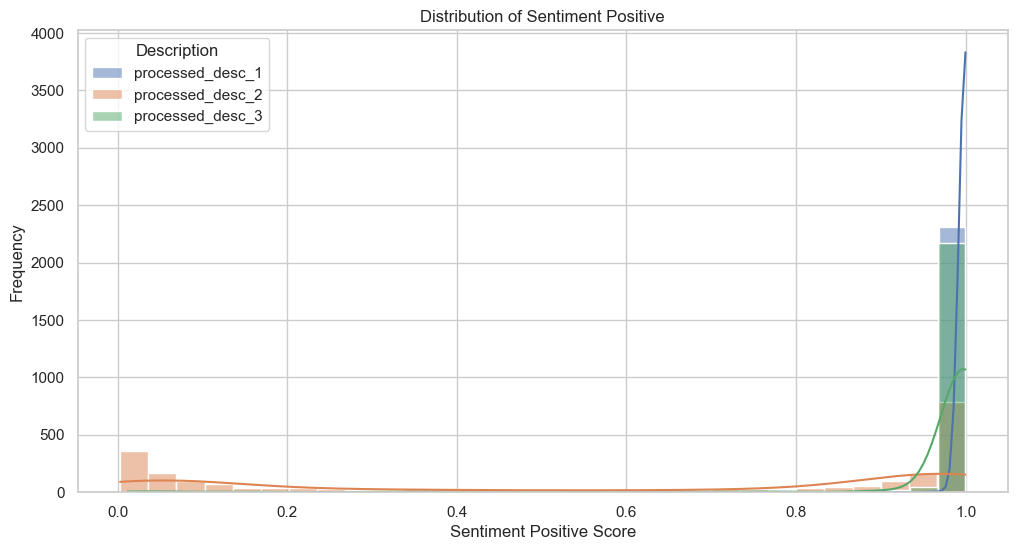

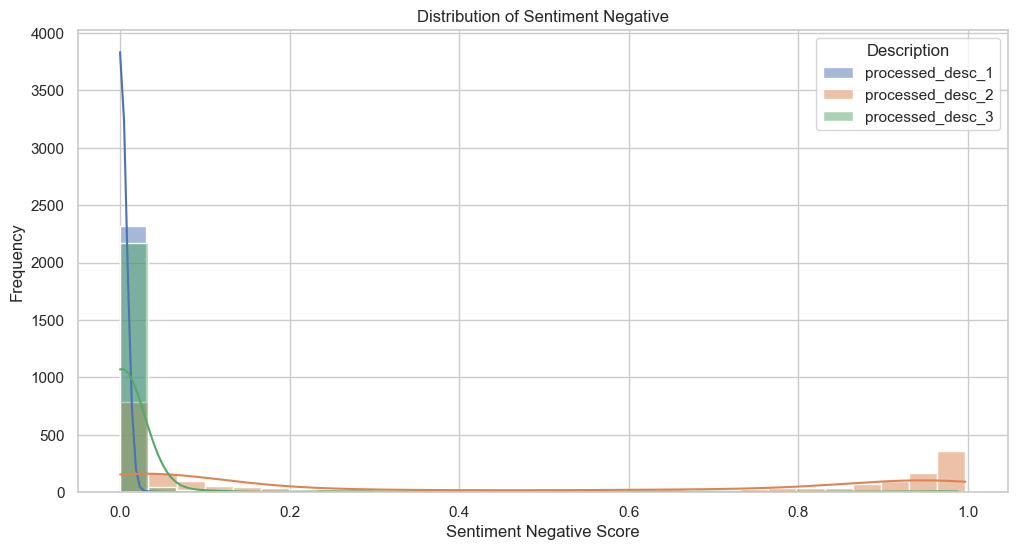

In [3]:
# Visualize sentiment distributions
for sentiment_type in ["sentiment_positive", "sentiment_negative"]:
    plt.figure(figsize=(12, 6))
    
    for col in ['processed_desc_1', 'processed_desc_2', 'processed_desc_3']:
        # Extract the relevant columns from the main DataFrame
        column_name = f"{col}_{sentiment_type}"
        sentiment_values = df_sentiment[column_name].to_numpy()
        
        # Plot sentiment distributions
        sns.histplot(
            sentiment_values,
            bins=30,
            kde=True,
            label=f"{col}",
        )
    
    # Add plot titles and labels
    plt.title(f"Distribution of {sentiment_type.replace('_', ' ').title()}")
    plt.xlabel(f"{sentiment_type.replace('_', ' ').title()} Score")
    plt.ylabel("Frequency")
    plt.legend(title="Description")
    plt.show()

## 2.2 TF-IDF 

In [4]:
# TF-IDF Extraction for Processed Descriptions
print("Extracting TF-IDF descriptors...")

tfidf_features = {}

# Extract TF-IDF features for each description
for col in ['processed_desc_1', 'processed_desc_2', 'processed_desc_3']:
    print(f"Processing TF-IDF for: {col}")
    try:
        tfidf_features[col] = fe.extract_coffee_descriptors(
            df_sentiment[col].to_list()
        )  # Ensure compatibility with Polars Series
    except Exception as e:
        print(f"Error processing TF-IDF for {col}: {e}")
        tfidf_features[col] = pl.DataFrame()

# Combine all TF-IDF features into a single DataFrame with suffixes
df_tfidf = pl.concat(
    [
        pl.DataFrame(tfidf_features[col]).rename(
            {column: f"{column}_{col}" for column in pl.DataFrame(tfidf_features[col]).columns}
        )
        for col in tfidf_features
    ],
    how="horizontal"
)
print(f"TF-IDF Extraction Complete. Shape: {df_tfidf.shape}")

# Save the TF-IDF features
tfidf_output_path = output_dir / "tfidf_features.parquet"
df_tfidf.write_parquet(str(tfidf_output_path))
print(f"TF-IDF features saved to: {tfidf_output_path}")

Extracting TF-IDF descriptors...
Processing TF-IDF for: processed_desc_1
Extracting coffee descriptors with TF-IDF...
Processing TF-IDF for: processed_desc_2
Extracting coffee descriptors with TF-IDF...
Processing TF-IDF for: processed_desc_3
Extracting coffee descriptors with TF-IDF...
TF-IDF Extraction Complete. Shape: (2322, 3000)
TF-IDF features saved to: /Users/seijas/Code/coffee-text-analytics/data/processed/tfidf_features.parquet


### Visualisations

Visualizing top TF-IDF terms for processed_desc_1...


/var/folders/tp/2v2g7skx77g81sk2wy2r123w0000gn/T/ipykernel_68955/292700896.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


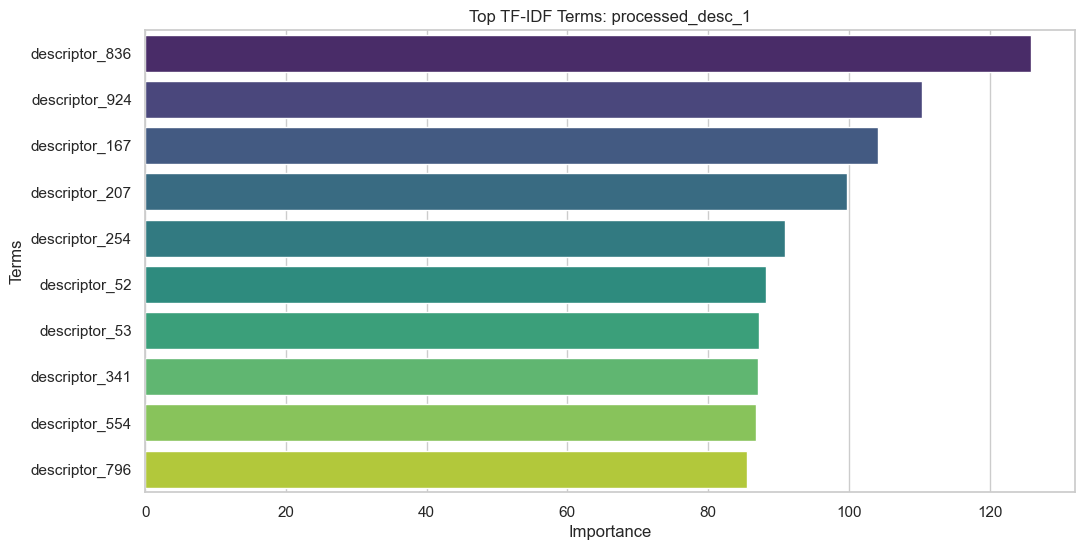

/var/folders/tp/2v2g7skx77g81sk2wy2r123w0000gn/T/ipykernel_68955/292700896.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Visualizing top TF-IDF terms for processed_desc_2...


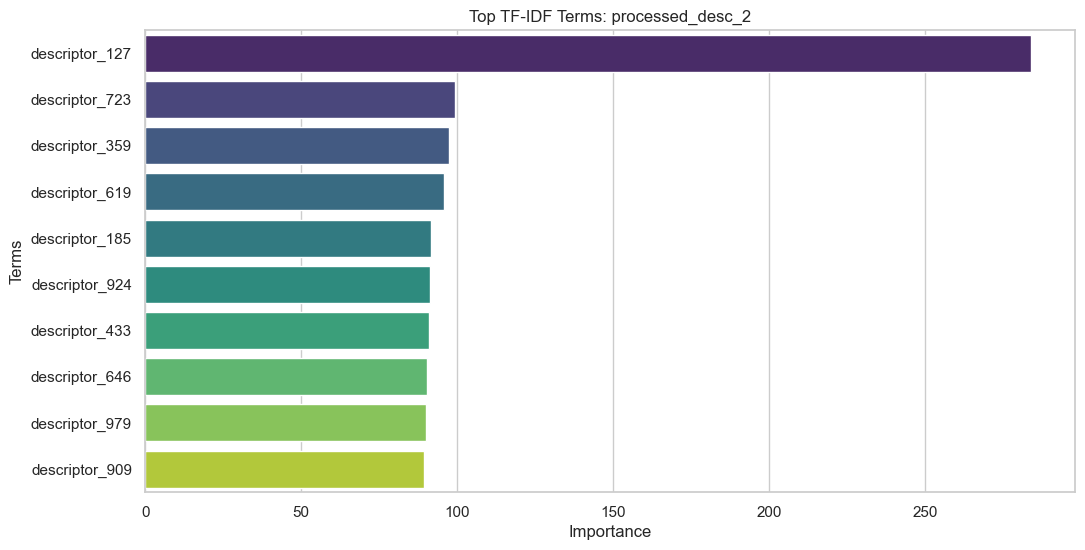

Visualizing top TF-IDF terms for processed_desc_3...


/var/folders/tp/2v2g7skx77g81sk2wy2r123w0000gn/T/ipykernel_68955/292700896.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


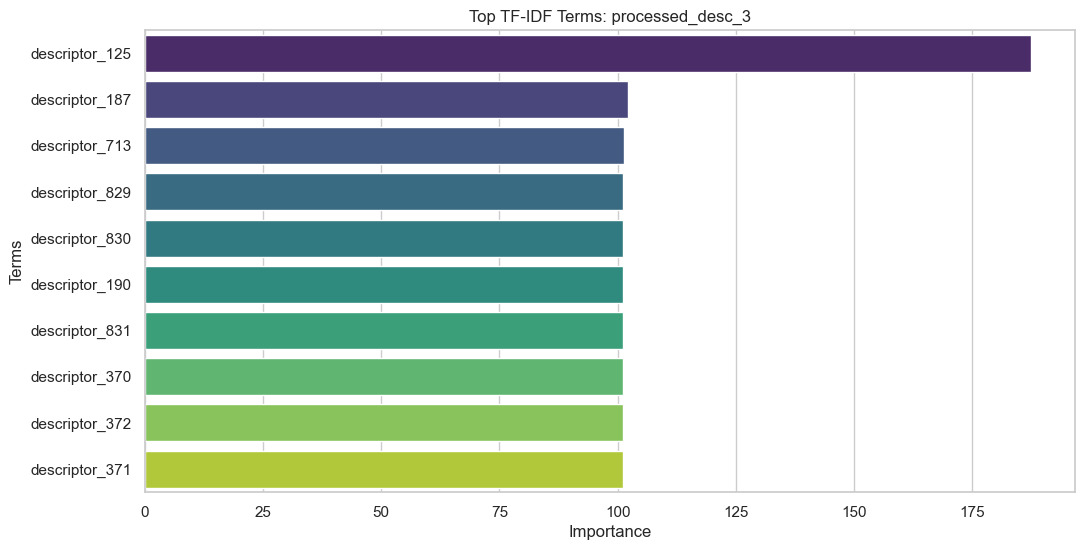

In [5]:
# Visualize top terms for TF-IDF
for col in ['processed_desc_1', 'processed_desc_2', 'processed_desc_3']:
    print(f"Visualizing top TF-IDF terms for {col}...")

    # Extract TF-IDF feature DataFrame for the current column
    tfidf_df = pl.DataFrame(tfidf_features[col])

    # Compute the sum of each term across all rows
    term_importance = tfidf_df.select(
        [pl.sum(column).alias(column) for column in tfidf_df.columns]
    ).to_pandas()

    # Reshape and prepare data for visualization
    term_importance = (
        term_importance.T  # Transpose for easier manipulation
        .reset_index()  # Reset index to get terms as a column
        .rename(columns={"index": "terms", 0: "importance"})  # Rename columns
        .sort_values(by="importance", ascending=False)  # Sort by importance
        .head(10)  # Select top 10 terms
    )

    # Plot top terms
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x="importance",
        y="terms",
        data=term_importance,
        palette="viridis"
    )
    plt.title(f"Top TF-IDF Terms: {col}")
    plt.xlabel("Importance")
    plt.ylabel("Terms")
    plt.show()

## 2.3 Embeddings

In [6]:
# Semantic Embedding Generation
print("Generating semantic embeddings...")

embedding_features = {}

# Generate embeddings for each processed description
for col in ['processed_desc_1', 'processed_desc_2', 'processed_desc_3']:
    print(f"Processing embeddings for: {col}")
    try:
        # Generate embeddings and ensure compatibility
        embedding_features[col] = fe.compute_semantic_embeddings(
            df_sentiment[col].to_list()
        )
    except Exception as e:
        print(f"Error generating embeddings for {col}: {e}")
        embedding_features[col] = pl.DataFrame()

# Combine all embeddings into a single Polars DataFrame with suffixes
try:
    df_embeddings_combined = pl.concat(
        [
            embedding_features[col].rename(
                {column: f"{column}_{col}" for column in embedding_features[col].columns}
            )
            for col in embedding_features
        ],
        how="horizontal"
    )
    print(f"Embedding Generation Complete. Shape: {df_embeddings_combined.shape}")
except Exception as e:
    print(f"Error combining embeddings: {e}")
    df_embeddings_combined = pl.DataFrame()

# Save the generated embeddings
embedding_output_path = output_dir / "embeddings_combined.parquet"
df_embeddings_combined.write_parquet(str(embedding_output_path))
print(f"Embeddings saved to: {embedding_output_path}")

Generating semantic embeddings...
Processing embeddings for: processed_desc_1
Computing semantic embeddings...
Processing embeddings for: processed_desc_2
Computing semantic embeddings...
Processing embeddings for: processed_desc_3
Computing semantic embeddings...
Embedding Generation Complete. Shape: (2322, 2304)
Embeddings saved to: /Users/seijas/Code/coffee-text-analytics/data/processed/embeddings_combined.parquet


Generating t-SNE for: processed_desc_1...


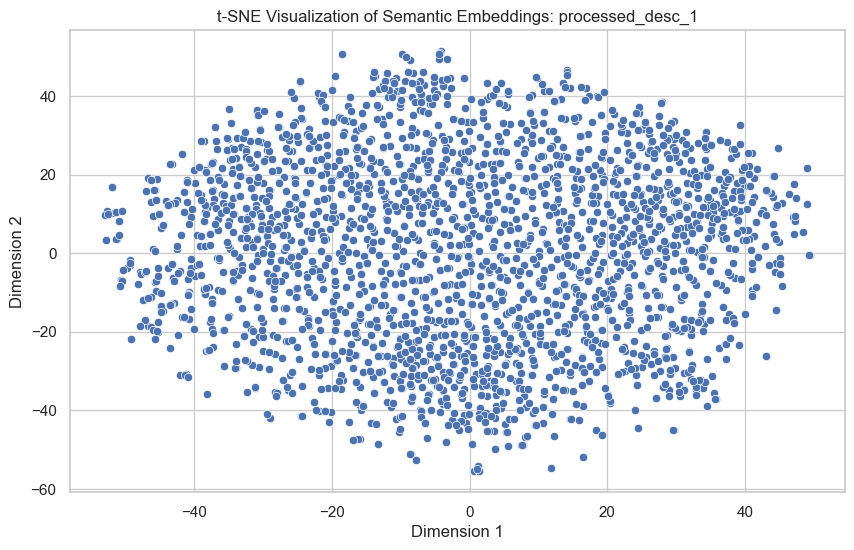

Generating t-SNE for: processed_desc_2...


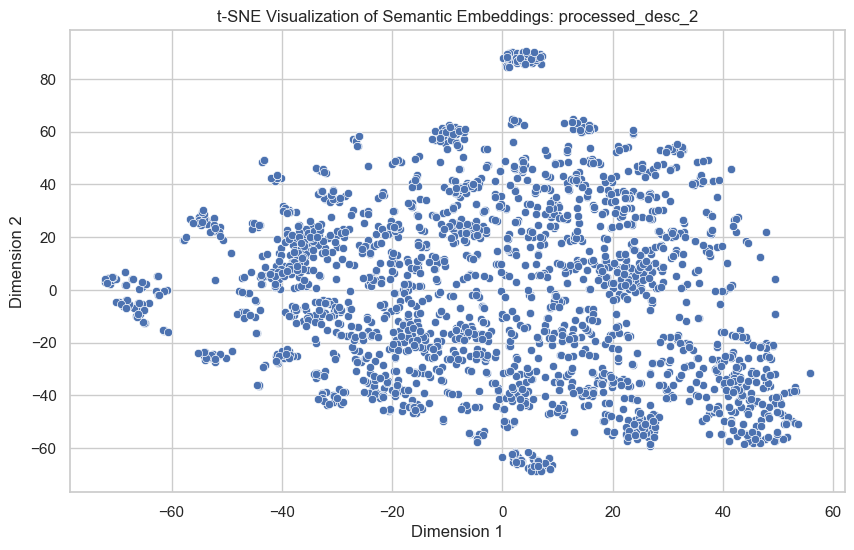

Generating t-SNE for: processed_desc_3...


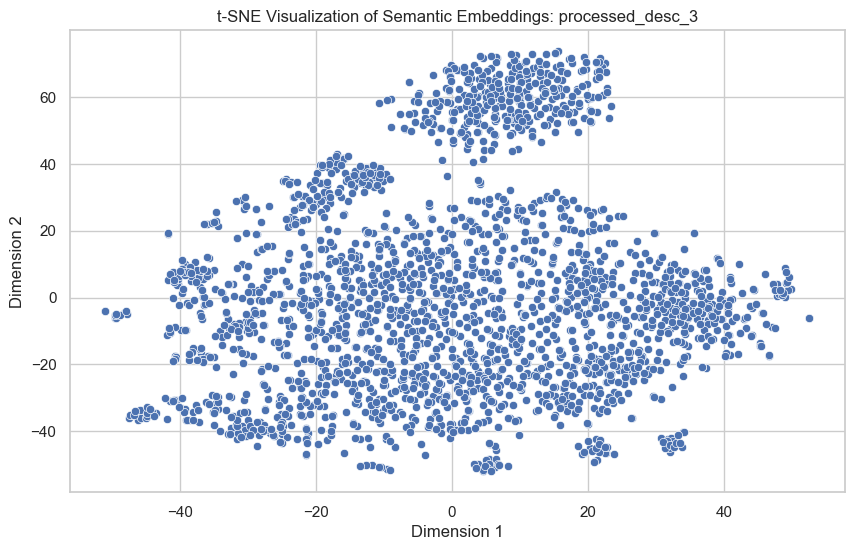

In [7]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate and visualize t-SNE for each description
for col in ['processed_desc_1', 'processed_desc_2', 'processed_desc_3']:
    print(f"Generating t-SNE for: {col}...")

    # Extract embeddings for the current description
    embeddings = df_embeddings_combined.select(
        pl.col(f"semantic_{i}_{col}") for i in range(df_embeddings_combined.shape[1] // 3)
    ).to_numpy()

    # Run t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
    tsne_results = tsne.fit_transform(embeddings)

    # Create a Pandas DataFrame for visualization
    tsne_df = pd.DataFrame(tsne_results, columns=["Dimension 1", "Dimension 2"])

    # Plot the t-SNE
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x="Dimension 1",
        y="Dimension 2",
        data=tsne_df
    )
    plt.title(f"t-SNE Visualization of Semantic Embeddings: {col}")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

Clustering embeddings for: processed_desc_1
Visualizing clusters for processed_desc_1...


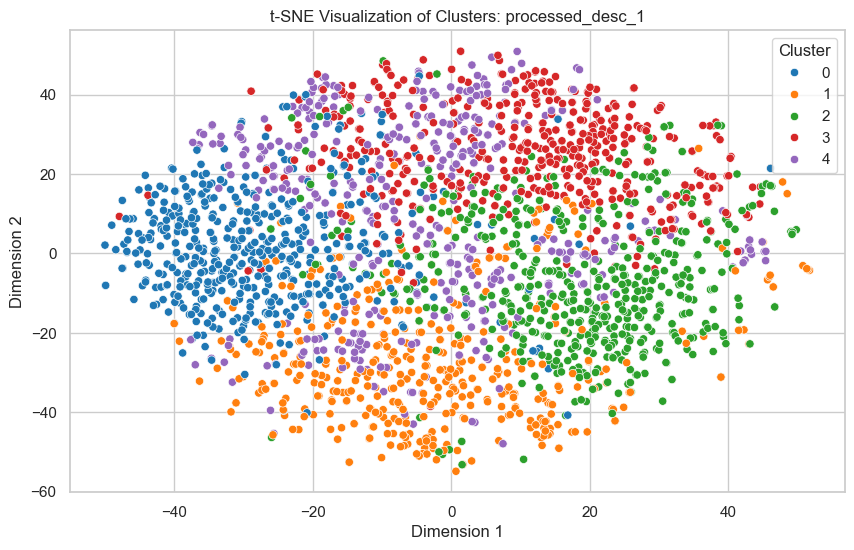

Clustering embeddings for: processed_desc_2
Visualizing clusters for processed_desc_2...


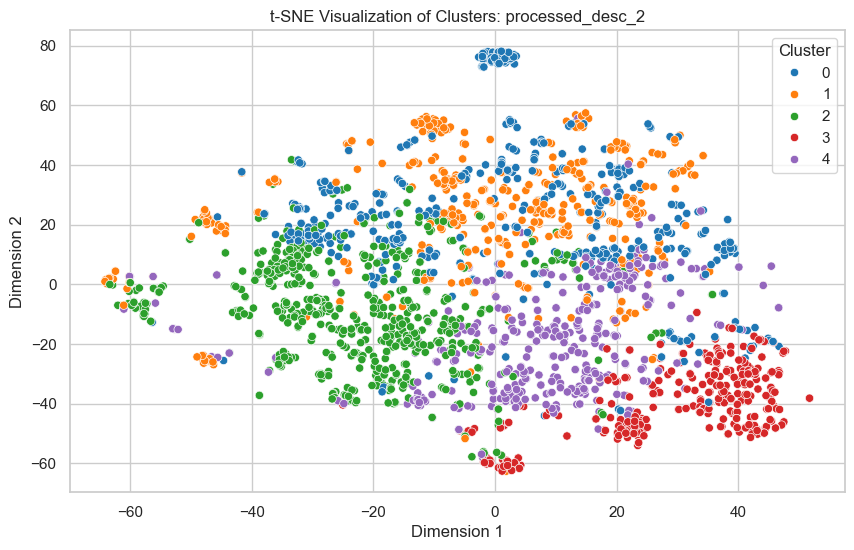

Clustering embeddings for: processed_desc_3
Visualizing clusters for processed_desc_3...


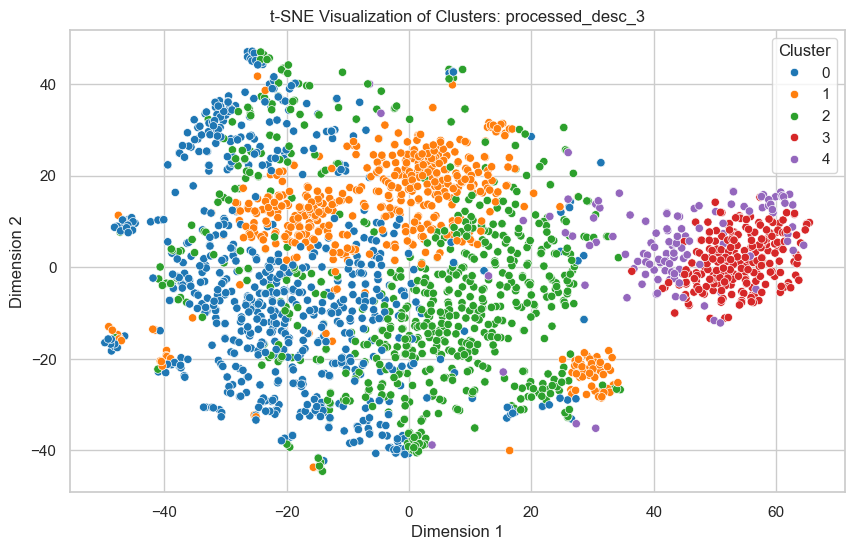

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Number of clusters
n_clusters = 5

# Clustering results
cluster_results = {}

# Perform clustering for each processed description
for col in ['processed_desc_1', 'processed_desc_2', 'processed_desc_3']:
    print(f"Clustering embeddings for: {col}")
    
    # Extract embeddings
    embeddings = embedding_features[col].to_numpy()
    
    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Add cluster labels to embeddings DataFrame
    embedding_features[col] = embedding_features[col].with_columns(
        pl.Series(f"{col}_cluster", cluster_labels)
    )
    
    cluster_results[col] = cluster_labels

    # Visualize clusters using t-SNE
    print(f"Visualizing clusters for {col}...")
    tsne = TSNE(n_components=2, random_state=42)
    tsne_emb = tsne.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=tsne_emb[:, 0],
        y=tsne_emb[:, 1],
        hue=cluster_labels,
        palette="tab10",
        legend="full"
    )
    plt.title(f"t-SNE Visualization of Clusters: {col}")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend(title="Cluster", loc="best")
    plt.show()

Running Elbow Method for all descriptions...
Computing Elbow for processed_desc_1...
Computing Elbow for processed_desc_2...
Computing Elbow for processed_desc_3...


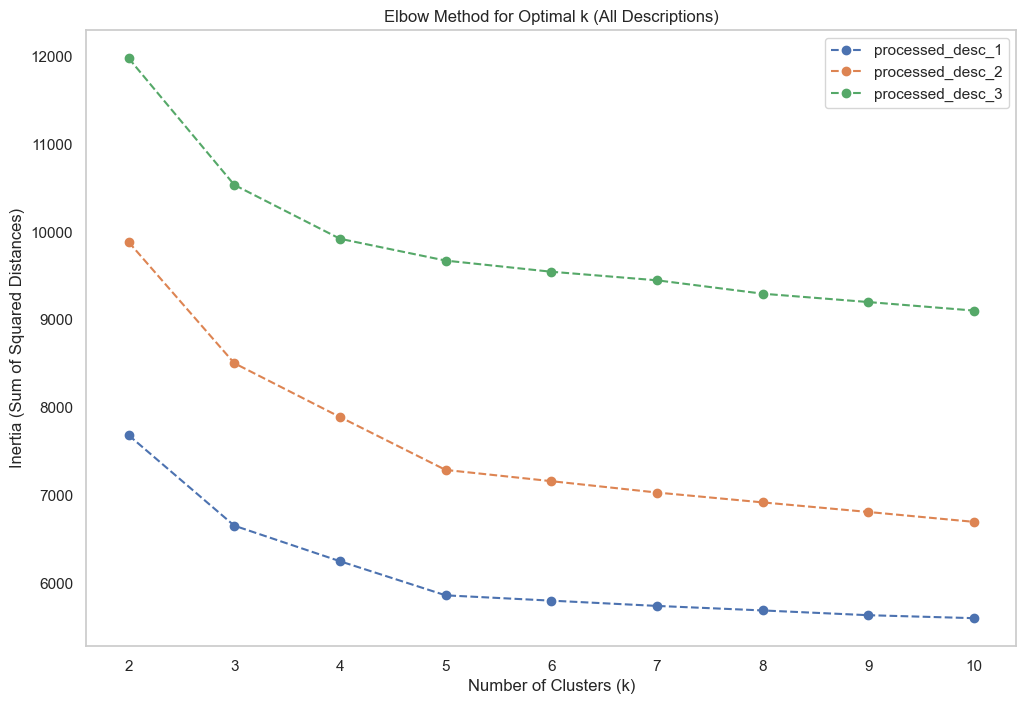

In [9]:
# Define range of k values to test
k_values = range(2, 11)

# Initialize a dictionary to store inertia values for each description
inertia_dict = {}

print("Running Elbow Method for all descriptions...")
for col in ['processed_desc_1', 'processed_desc_2', 'processed_desc_3']:
    print(f"Computing Elbow for {col}...")
    embeddings_to_test = embedding_features[col].to_numpy()
    inertia_values = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(embeddings_to_test)
        inertia_values.append(kmeans.inertia_)
    
    inertia_dict[col] = inertia_values

# Plot the Elbow Method results for all descriptions
plt.figure(figsize=(12, 8))
for col in inertia_dict.keys():
    plt.plot(k_values, inertia_dict[col], marker='o', linestyle='--', label=col)

plt.title("Elbow Method for Optimal k (All Descriptions)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.legend()
plt.grid()
plt.show()

Clustering embeddings for processed_desc_1...
Clusters assigned for processed_desc_1.
Visualizing clusters for processed_desc_1...


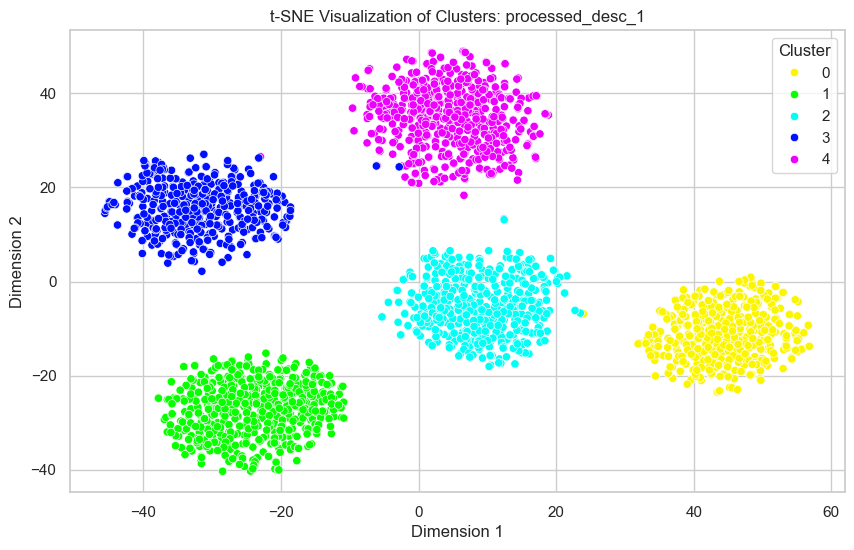

Clustering embeddings for processed_desc_2...
Clusters assigned for processed_desc_2.
Visualizing clusters for processed_desc_2...


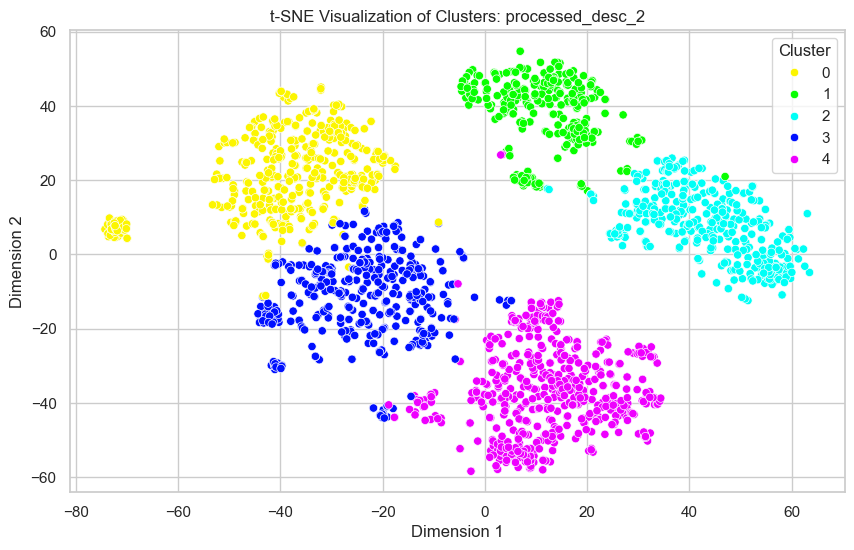

Clustering embeddings for processed_desc_3...
Clusters assigned for processed_desc_3.
Visualizing clusters for processed_desc_3...


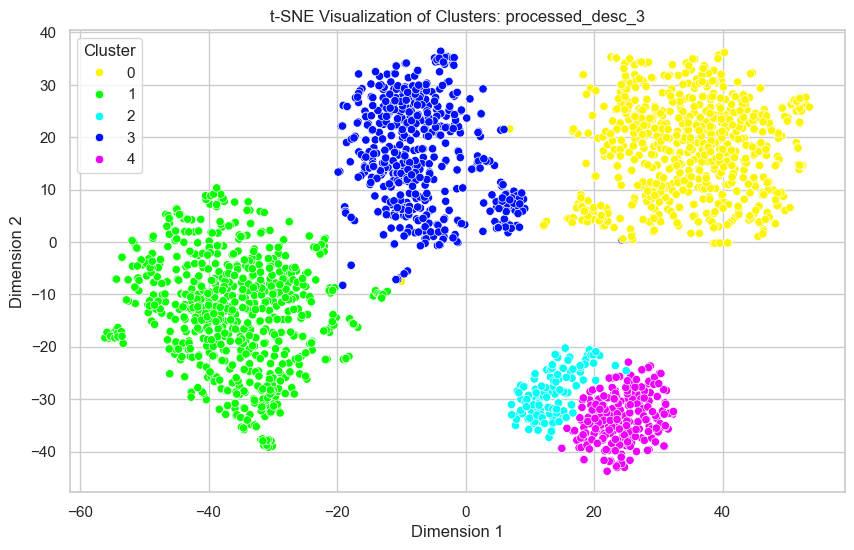

In [10]:
# Construct embeddings_dict from existing embeddings
embeddings_dict = {
    'processed_desc_1': embedding_features['processed_desc_1'].to_numpy(),
    'processed_desc_2': embedding_features['processed_desc_2'].to_numpy(),
    'processed_desc_3': embedding_features['processed_desc_3'].to_numpy(),
}

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define k
optimal_k = 5

# Dictionary to store cluster labels for each description
cluster_labels_dict = {}

for col in ['processed_desc_1', 'processed_desc_2', 'processed_desc_3']:
    print(f"Clustering embeddings for {col}...")
    
    # Select embeddings for the description
    embeddings = embeddings_dict[col]
    
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Store the cluster labels
    cluster_labels_dict[col] = cluster_labels

    # Add cluster labels to embeddings as a new column
    embeddings_with_clusters = pl.DataFrame(embeddings).hstack(
        [pl.Series(f"{col}_cluster", cluster_labels)]
    )
    print(f"Clusters assigned for {col}.")

    # Visualize clusters using t-SNE
    print(f"Visualizing clusters for {col}...")
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(embeddings)
    
    # Convert to Pandas for visualization
    tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    tsne_df['Cluster'] = cluster_labels
    
    # Plot clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=tsne_df,
        x='Dimension 1', y='Dimension 2',
        hue='Cluster',
        palette=sns.color_palette('hsv', n_colors=optimal_k),
        legend='full'
    )
    plt.title(f"t-SNE Visualization of Clusters: {col}")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend(title='Cluster')
    plt.show()

## 2.4 Topic Modelling

In [12]:
# Topic Modeling (LDA and NMF) with Improved Coherence Calculation
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
import numpy as np

# Initialize parameters
n_topics_range = range(5, 16, 5)  # Number of topics to explore
max_features = 1000  # Limit for vocabulary size
topic_features = {}

def compute_coherence_score(model, tokenized_texts, dictionary, coherence_measure='c_v'):
    """Calculate the coherence score of topics generated by LDA/NMF."""
    try:
        topics = model.components_
        topic_words = [
            [dictionary[i] for i in topic.argsort()[:-11:-1] if i in dictionary] 
            for topic in topics
        ]
        coherence_model = CoherenceModel(
            topics=topic_words, texts=tokenized_texts, dictionary=dictionary, coherence=coherence_measure
        )
        return coherence_model.get_coherence()
    except Exception as e:
        print(f"Error computing coherence: {e}")
        return -1

def prepare_gensim_corpus(tokenized_texts):
    """Prepare a Gensim dictionary from tokenized texts."""
    dictionary = corpora.Dictionary(tokenized_texts)
    return dictionary

# Extract topics for each processed description
for col in ['processed_desc_1', 'processed_desc_2', 'processed_desc_3']:
    print(f"Extracting topics for: {col}")

    # Convert text into a document-term matrix
    vectorizer = CountVectorizer(max_features=max_features, stop_words='english', ngram_range=(1, 2))
    doc_term_matrix = vectorizer.fit_transform(df_sentiment[col].to_list())
    feature_names = vectorizer.get_feature_names_out()

    # Prepare Gensim dictionary and tokenized texts for coherence
    tokenized_texts = [text.split() for text in df_sentiment[col].to_list()]
    dictionary = prepare_gensim_corpus(tokenized_texts)

    best_lda_model = None
    best_nmf_model = None
    best_lda_coherence = -1
    best_nmf_coherence = -1

    for n_topics in n_topics_range:
        print(f"Testing {n_topics} topics for {col}...")

        # Perform LDA
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_topics = lda.fit_transform(doc_term_matrix)
        lda_coherence = compute_coherence_score(lda, tokenized_texts, dictionary)

        # Perform NMF
        nmf = NMF(n_components=n_topics, random_state=42, max_iter=1000)
        nmf_topics = nmf.fit_transform(doc_term_matrix)
        nmf_coherence = compute_coherence_score(nmf, tokenized_texts, dictionary)

        print(f"LDA Coherence: {lda_coherence}, NMF Coherence: {nmf_coherence}")

        # Save the best models based on coherence
        if not np.isnan(lda_coherence) and lda_coherence > best_lda_coherence:
            best_lda_coherence = lda_coherence
            best_lda_model = lda

        if not np.isnan(nmf_coherence) and nmf_coherence > best_nmf_coherence:
            best_nmf_coherence = nmf_coherence
            best_nmf_model = nmf

    print(f"Best LDA Coherence for {col}: {best_lda_coherence}")
    print(f"Best NMF Coherence for {col}: {best_nmf_coherence}")

    if best_lda_model is None:
        print(f"Falling back to default LDA model for {col}.")
        best_lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
        best_lda_model.fit(doc_term_matrix)

    if best_nmf_model is None:
        print(f"Falling back to default NMF model for {col}.")
        best_nmf_model = NMF(n_components=5, random_state=42, max_iter=1000)
        best_nmf_model.fit(doc_term_matrix)

    # Save topics and their corresponding word distributions
    topic_features[col] = {
        "LDA": {"topics": best_lda_model.transform(doc_term_matrix),
                "components": best_lda_model.components_,
                "names": feature_names},
        "NMF": {"topics": best_nmf_model.transform(doc_term_matrix),
                "components": best_nmf_model.components_,
                "names": feature_names},
    }

    print(f"Best topics extracted for {col}.")

# Save topic features for further analysis
topic_distributions = []
for col in topic_features.keys():
    lda_topics = topic_features[col]["LDA"]["topics"]
    nmf_topics = topic_features[col]["NMF"]["topics"]

    # Use the actual number of components for column names
    lda_df = pd.DataFrame(lda_topics, columns=[f"lda_{col}_topic_{i}" for i in range(lda_topics.shape[1])])
    nmf_df = pd.DataFrame(nmf_topics, columns=[f"nmf_{col}_topic_{i}" for i in range(nmf_topics.shape[1])])

    combined_df = pd.concat([lda_df, nmf_df], axis=1)
    topic_distributions.append(combined_df)

# Combine all topic distributions
final_topic_df = pd.concat(topic_distributions, axis=1)

# Save the final DataFrame
output_paths["topic_modeling"] = output_dir / "topic_distributions.parquet"
final_topic_df.to_parquet(output_paths["topic_modeling"], index=False)
print(f"Final topic distributions saved to: {output_paths['topic_modeling']}")

Extracting topics for: processed_desc_1
Testing 5 topics for processed_desc_1...
LDA Coherence: 0.4658335444934944, NMF Coherence: 0.5083677624967171
Testing 10 topics for processed_desc_1...
LDA Coherence: 0.47604352735668476, NMF Coherence: 0.4668058150808128
Testing 15 topics for processed_desc_1...
LDA Coherence: 0.4858450089278973, NMF Coherence: 0.4678049995100235
Best LDA Coherence for processed_desc_1: 0.4858450089278973
Best NMF Coherence for processed_desc_1: 0.5083677624967171
Best topics extracted for processed_desc_1.
Extracting topics for: processed_desc_2
Testing 5 topics for processed_desc_2...
LDA Coherence: 0.5371168175635411, NMF Coherence: 0.4306194055409656
Testing 10 topics for processed_desc_2...
LDA Coherence: 0.5097383566625792, NMF Coherence: 0.4588291519746776
Testing 15 topics for processed_desc_2...
LDA Coherence: 0.4968589404634886, NMF Coherence: 0.4874105698131163
Best LDA Coherence for processed_desc_2: 0.5371168175635411
Best NMF Coherence for processe

Visualizing LDA topics for: processed_desc_1


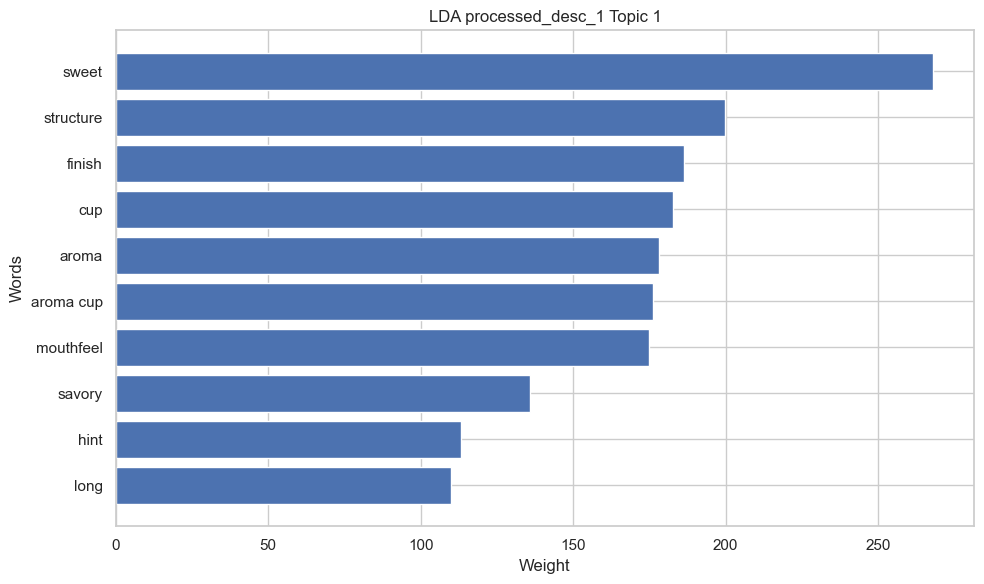

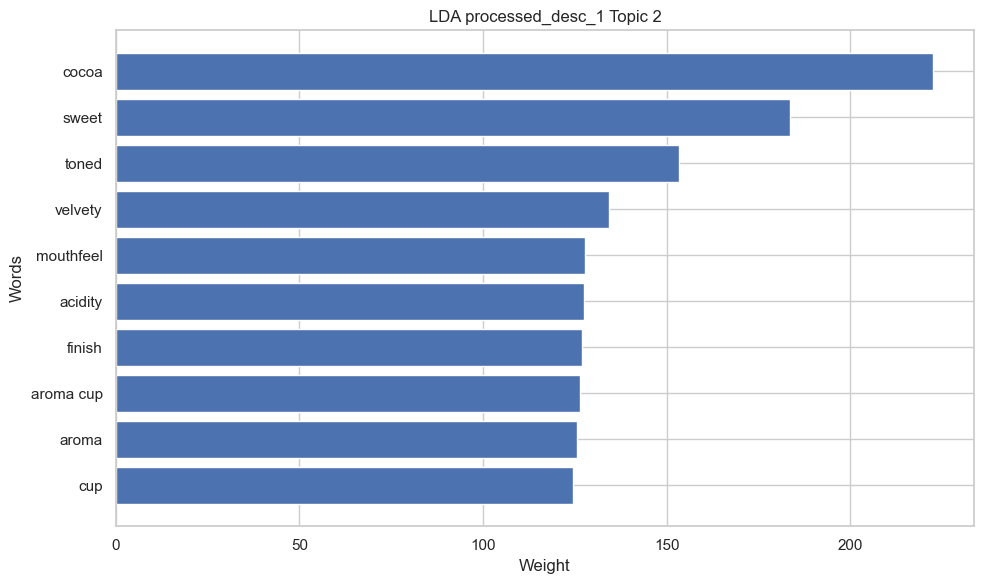

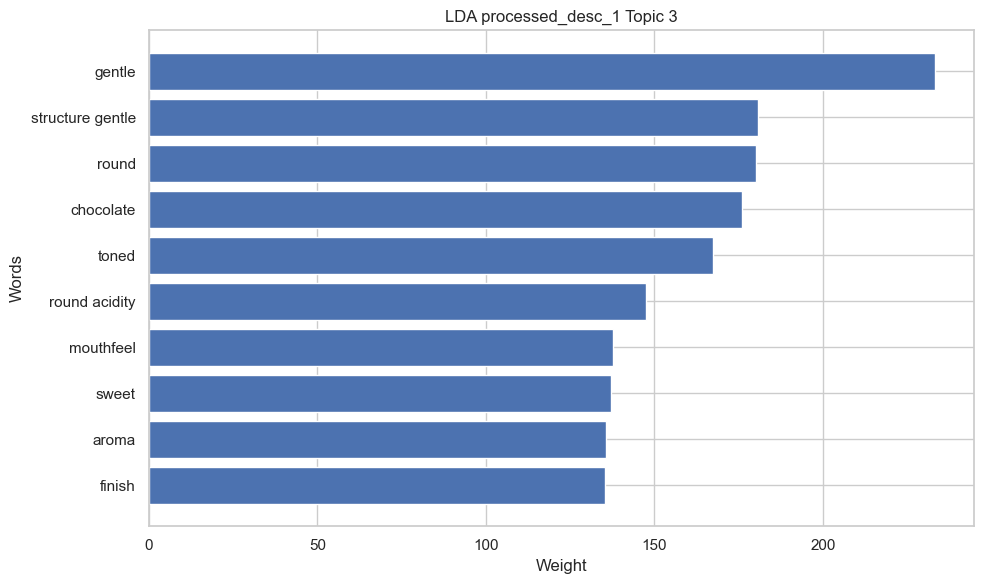

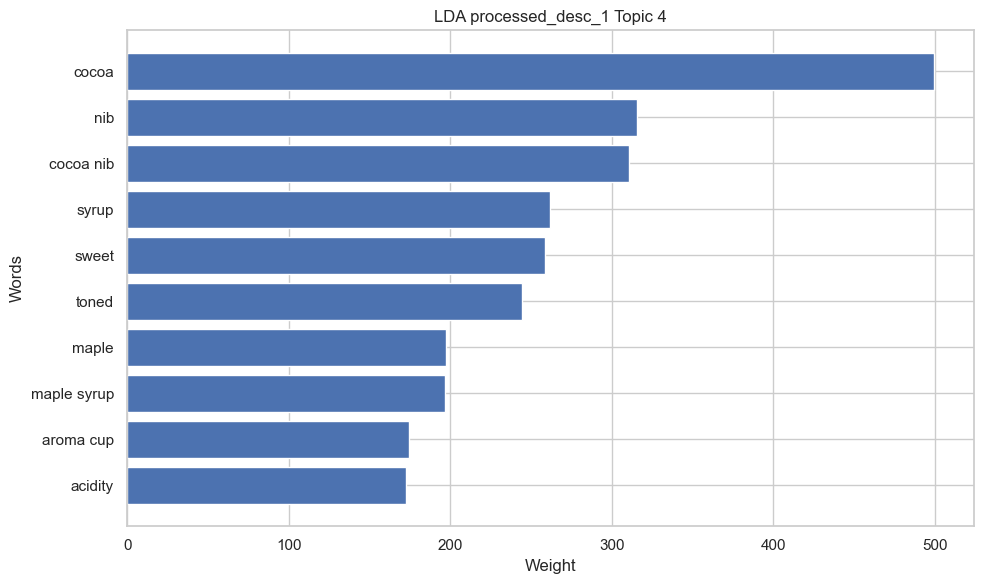

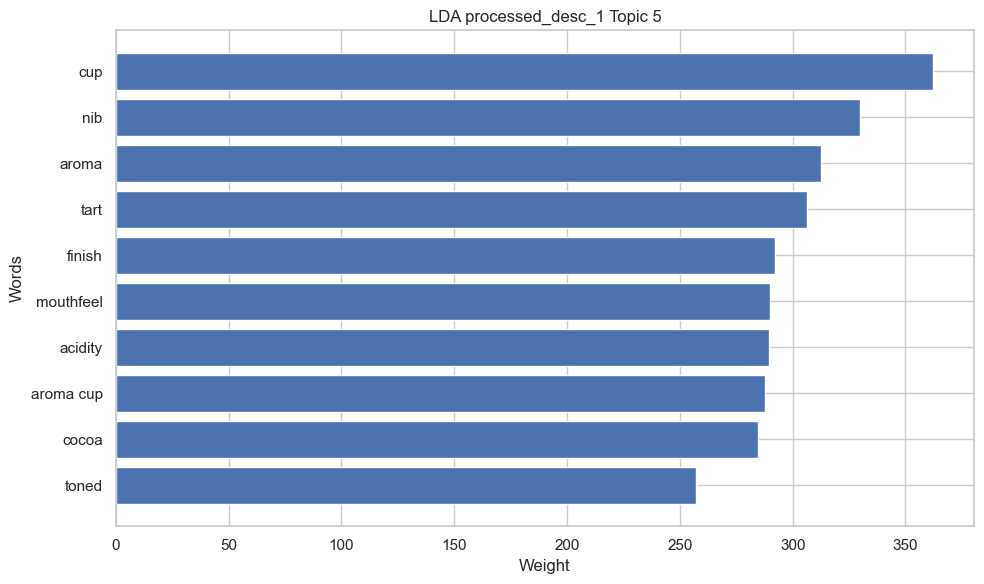

Visualizing NMF topics for: processed_desc_1


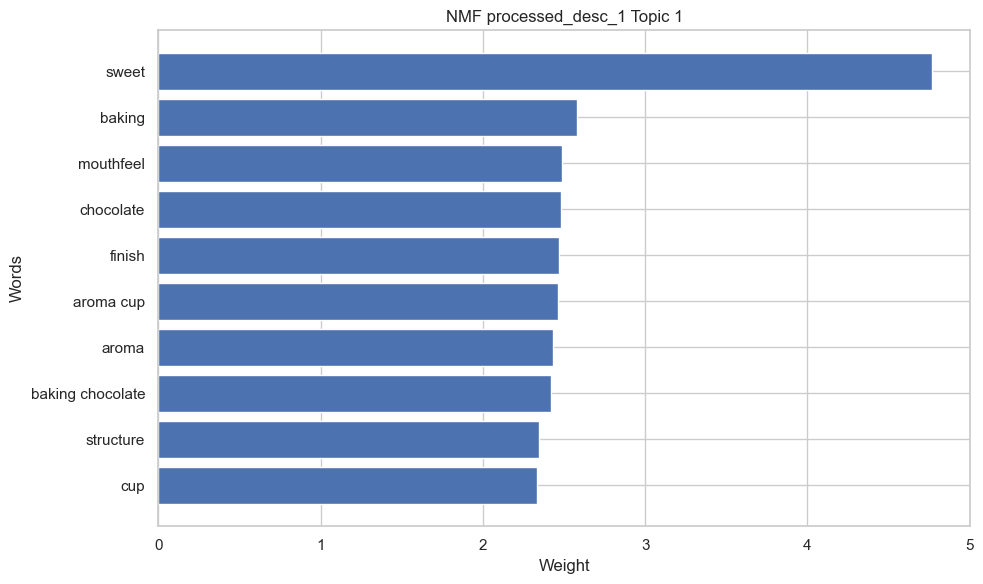

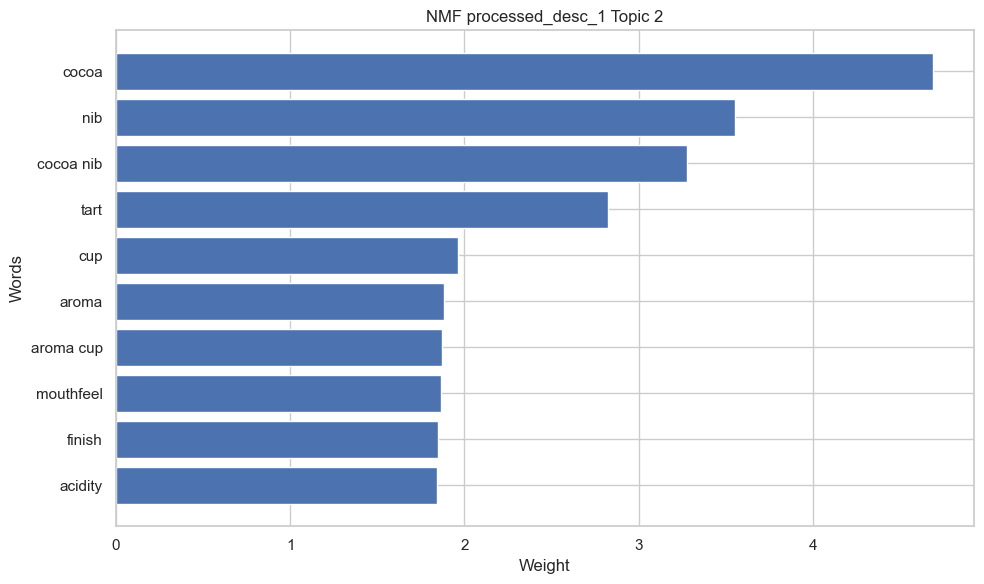

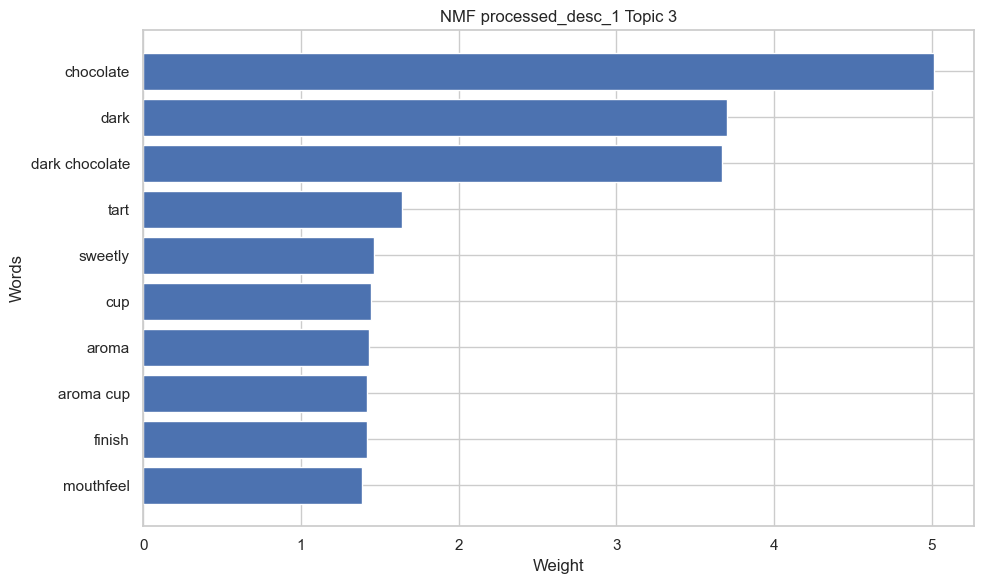

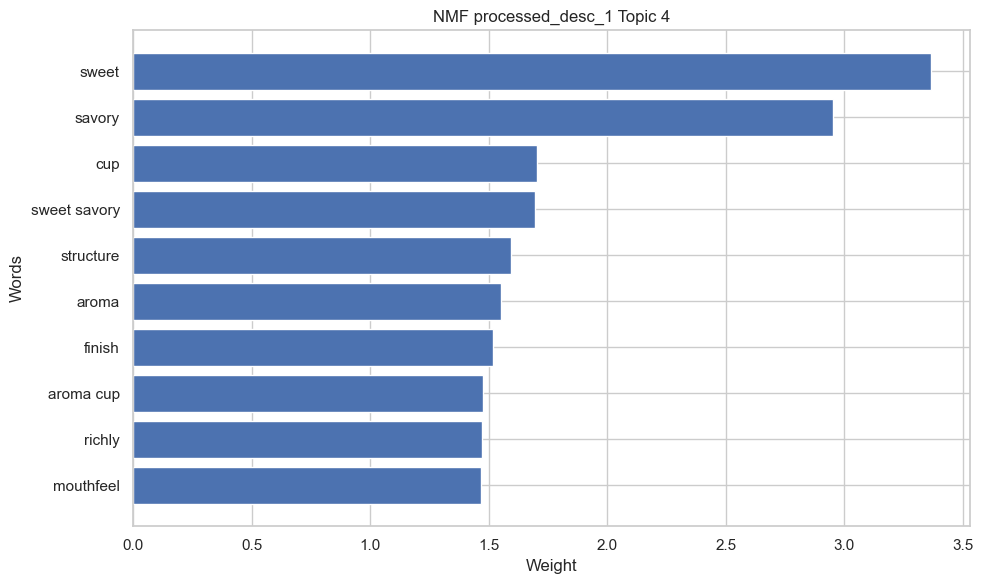

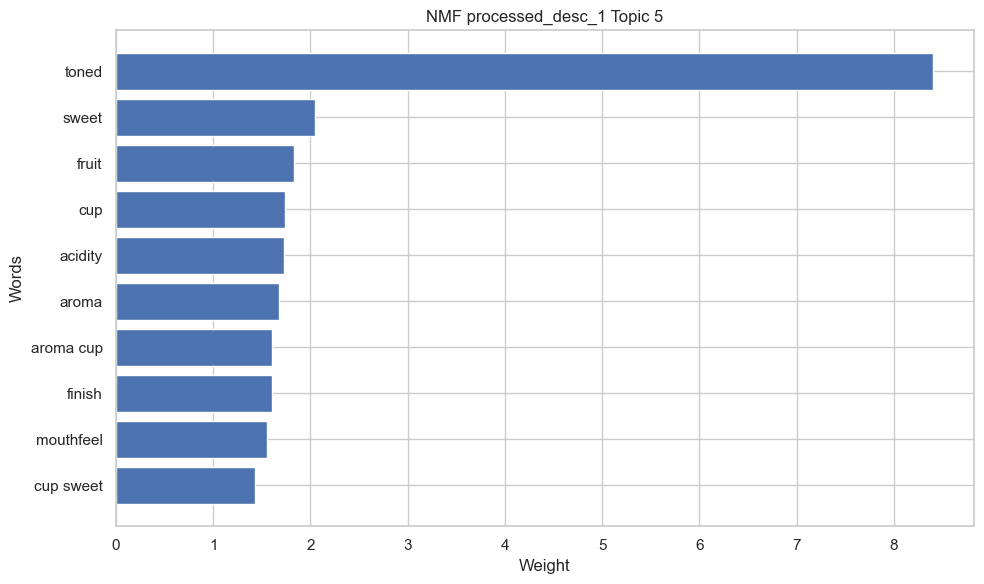

Visualizing LDA topics for: processed_desc_2


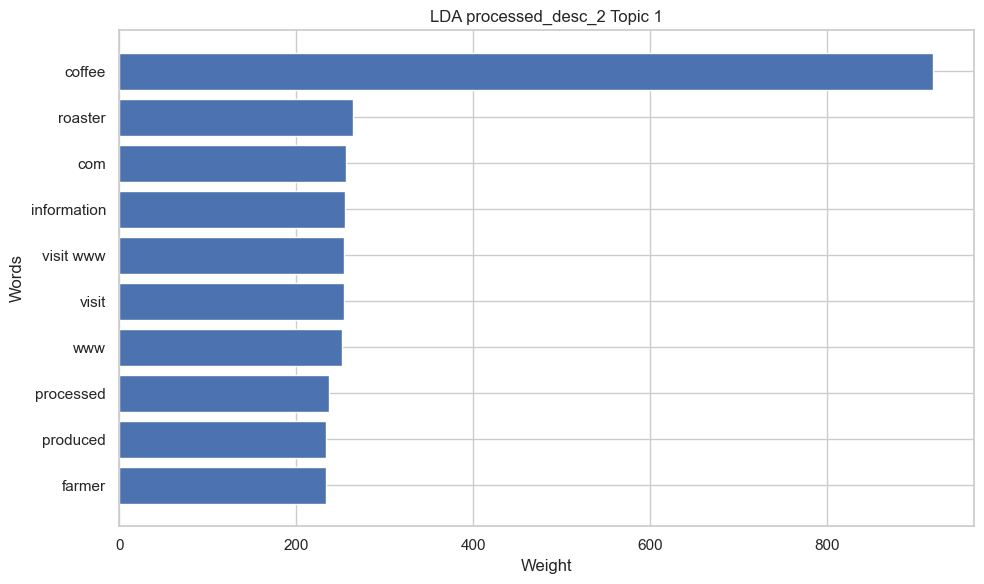

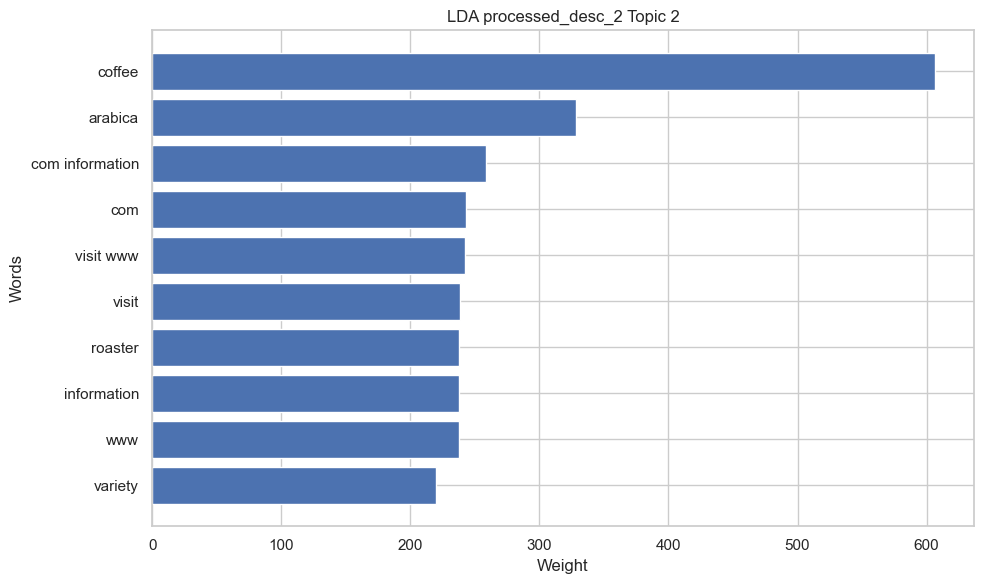

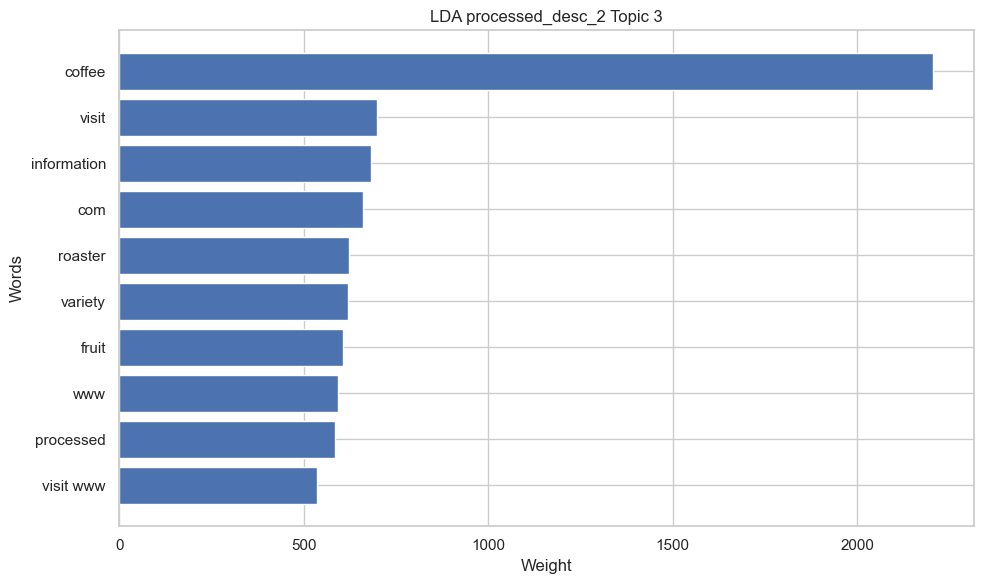

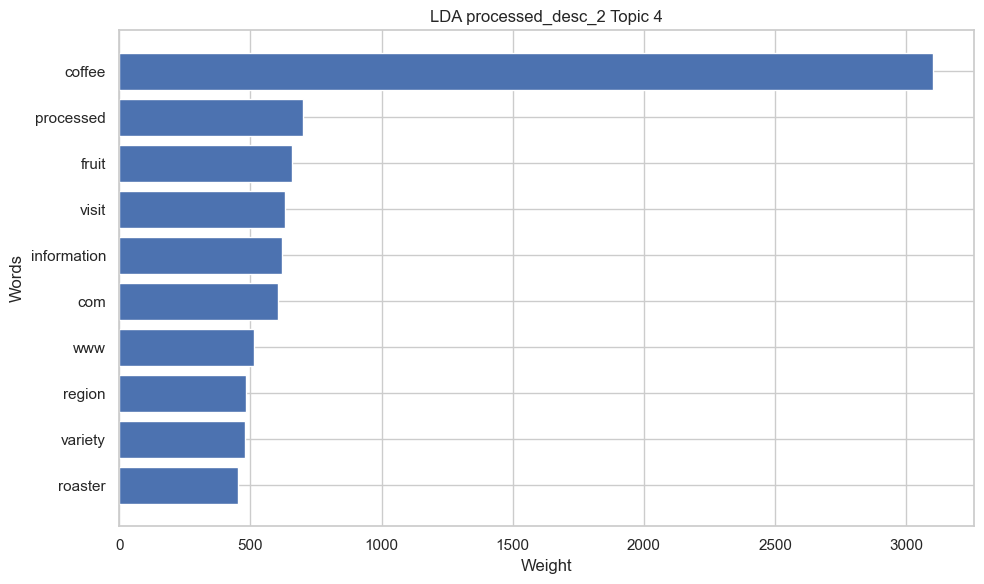

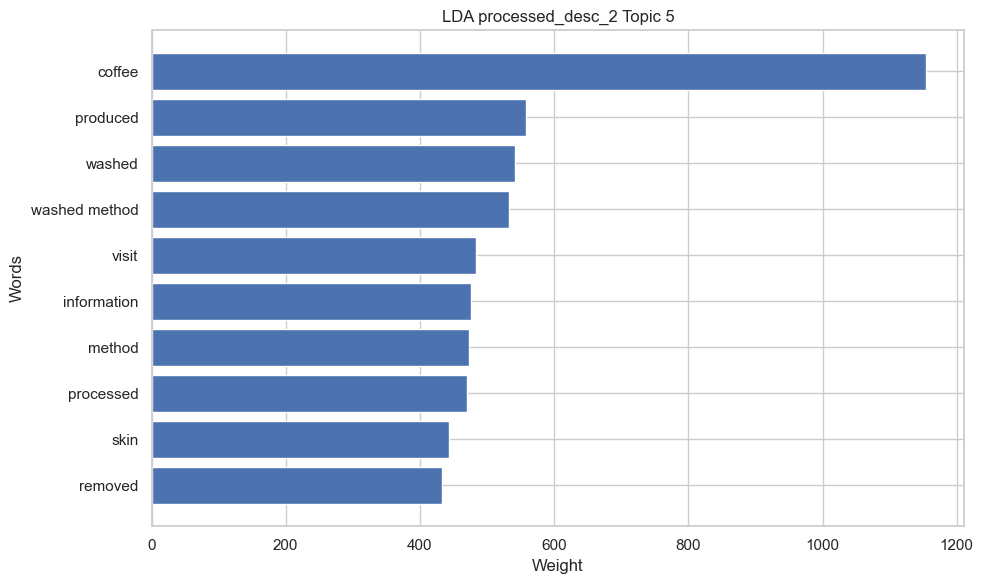

Visualizing NMF topics for: processed_desc_2


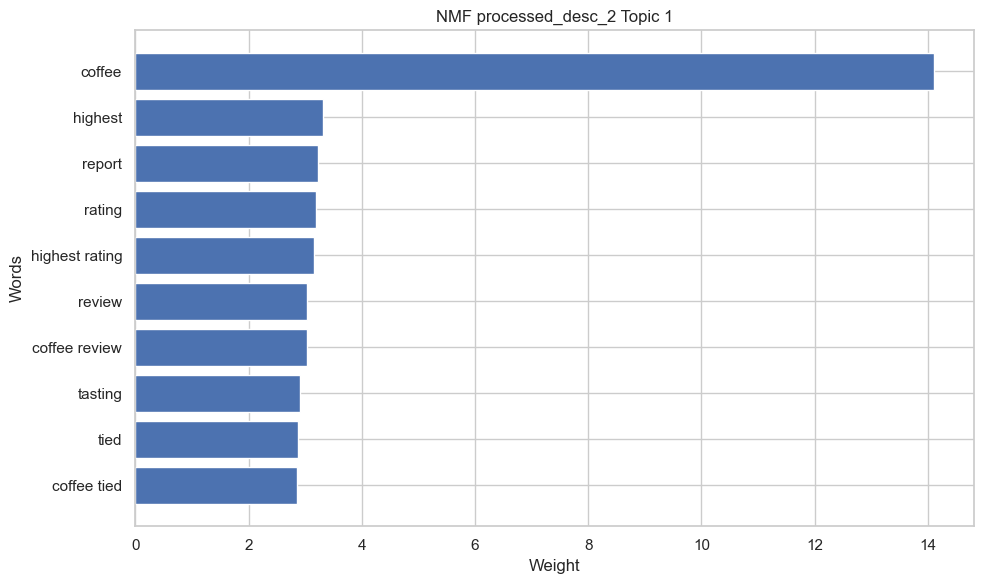

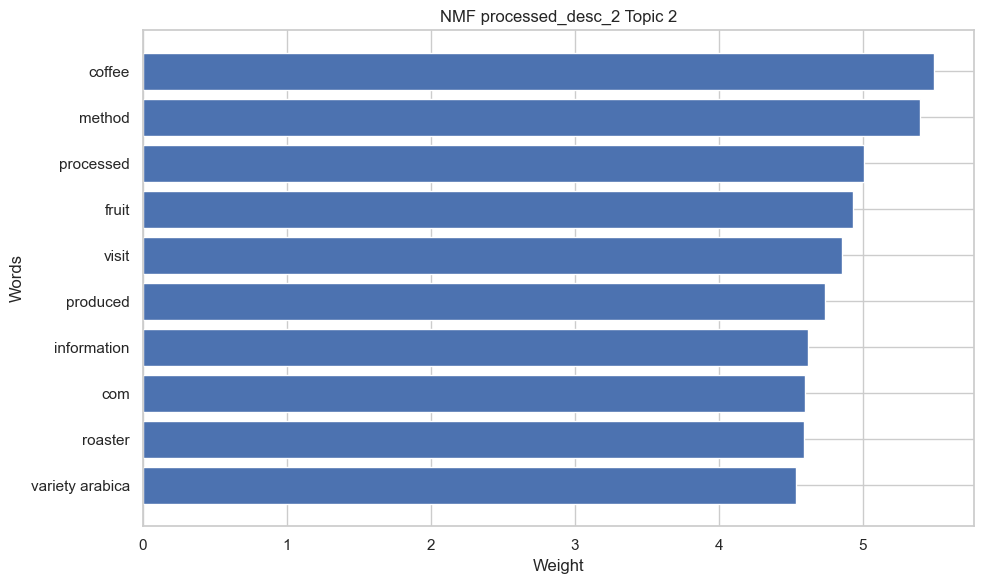

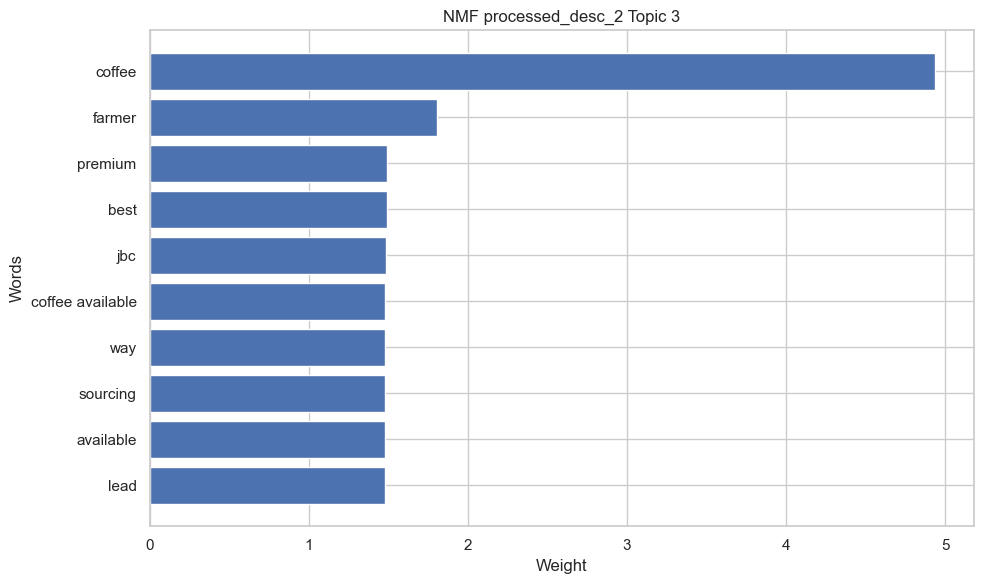

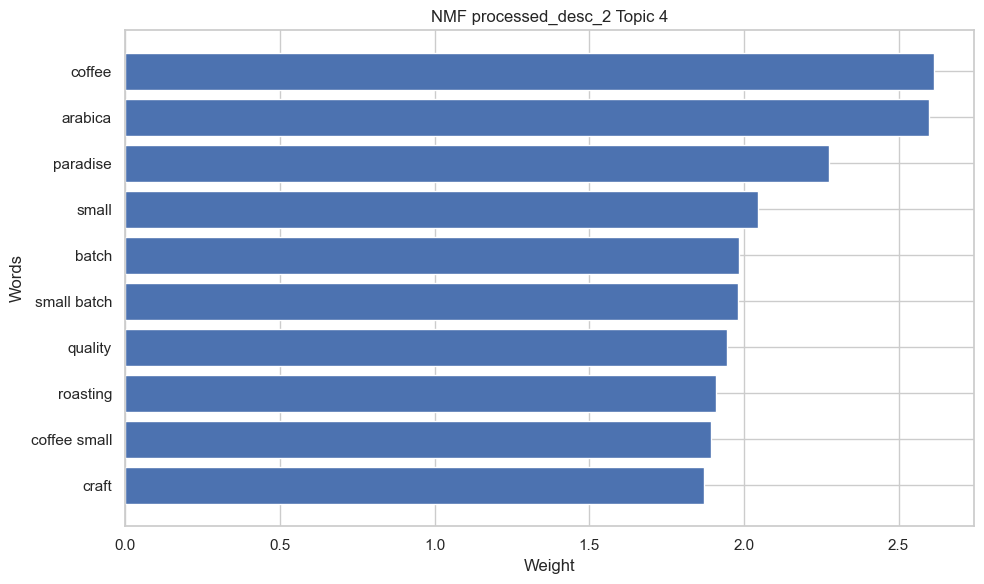

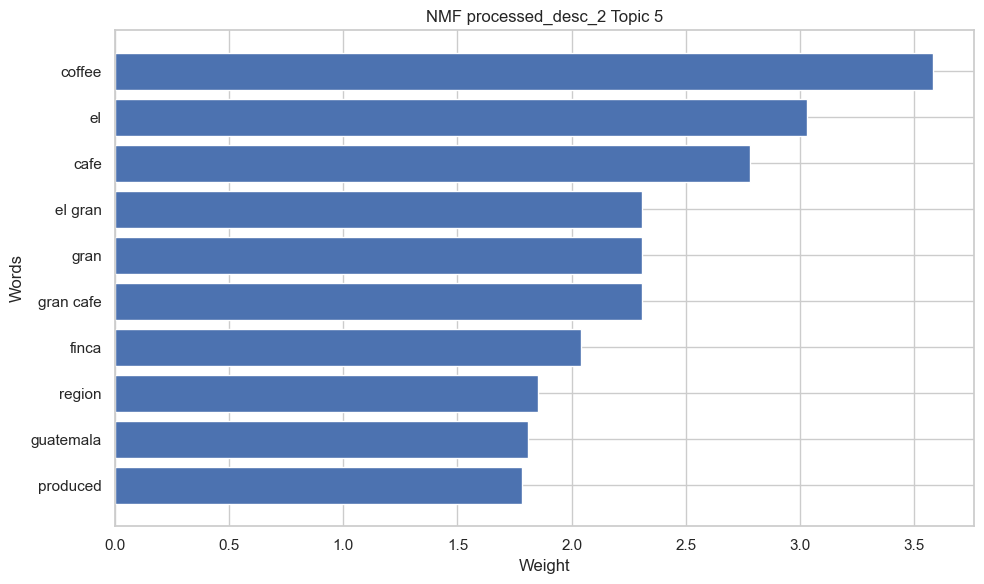

Visualizing LDA topics for: processed_desc_3


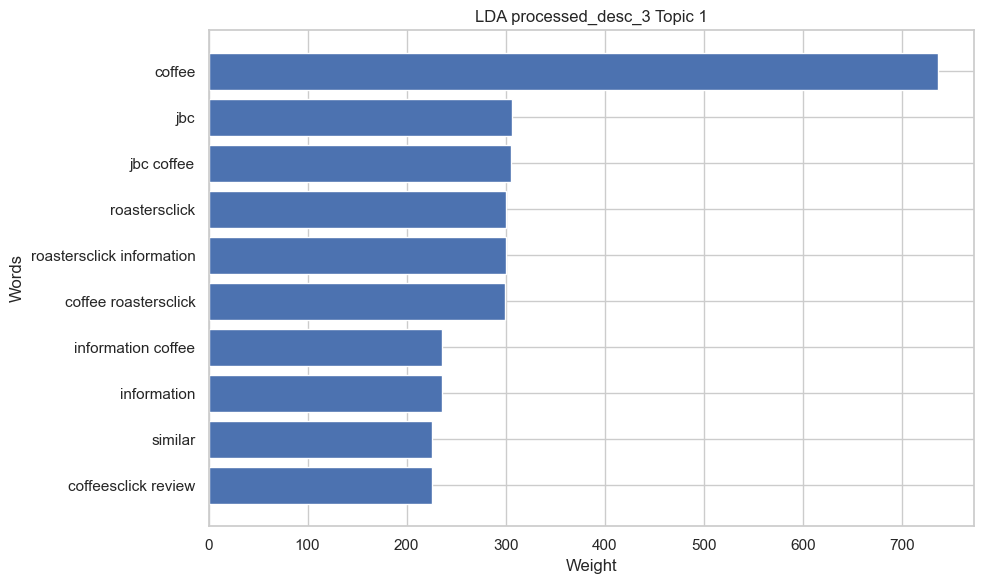

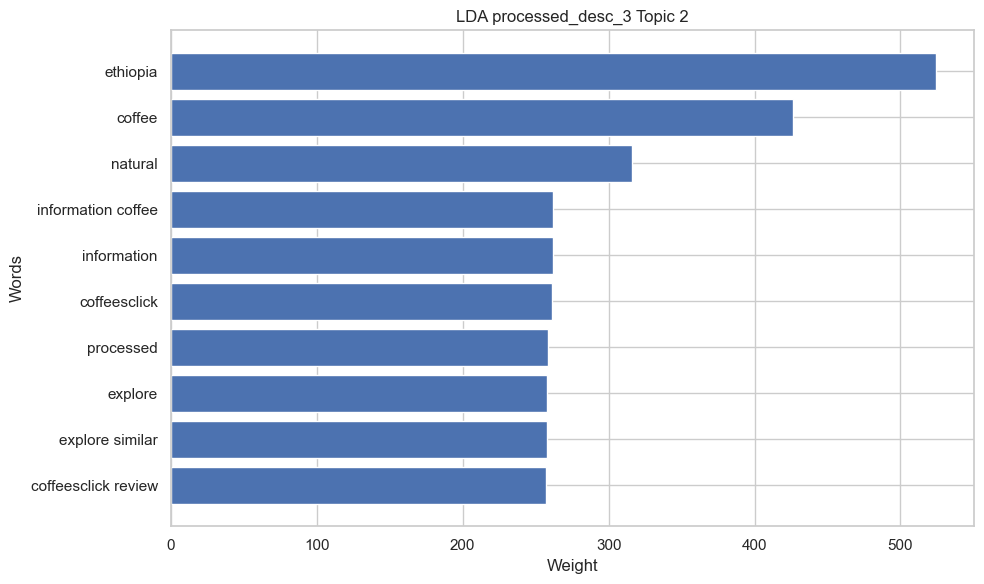

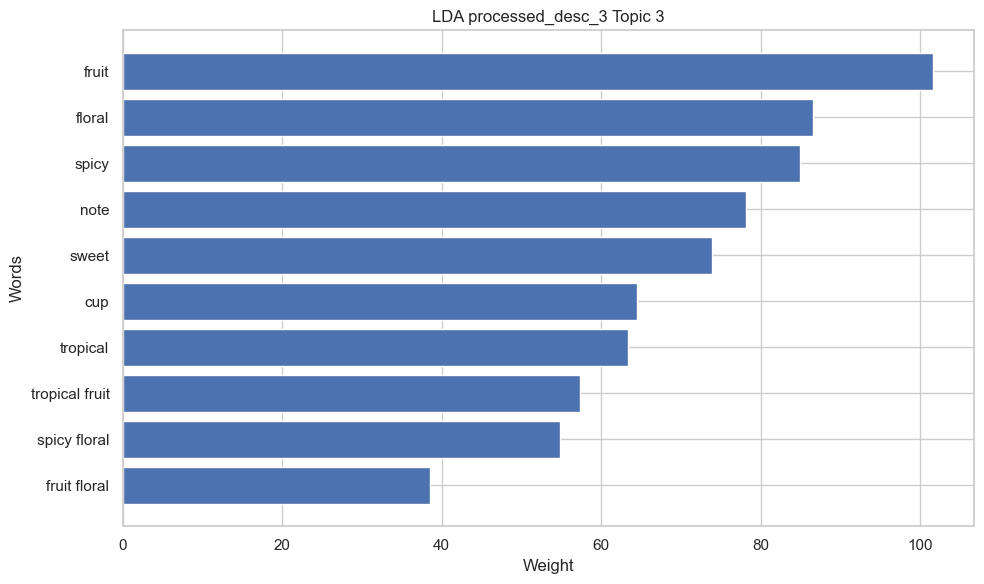

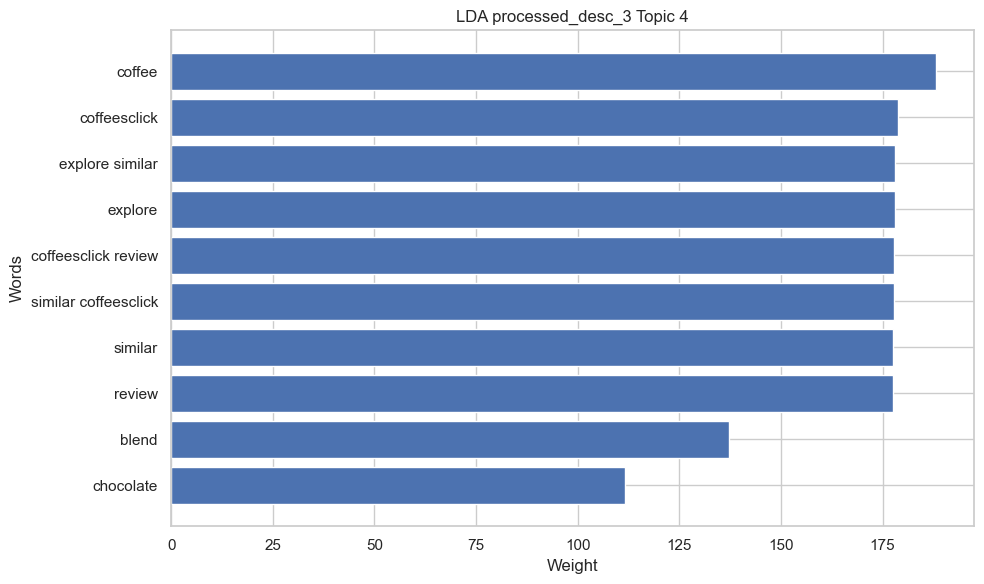

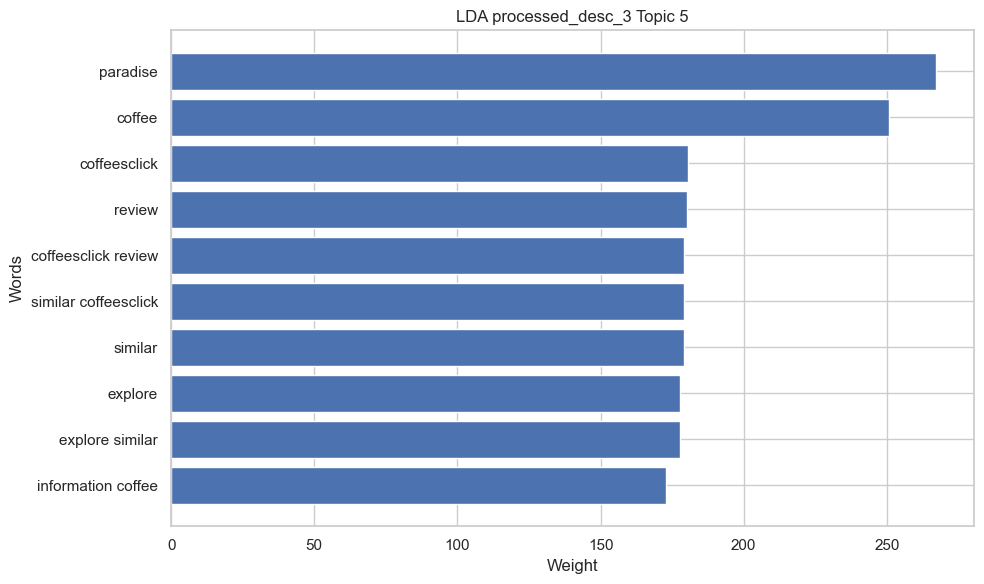

Visualizing NMF topics for: processed_desc_3


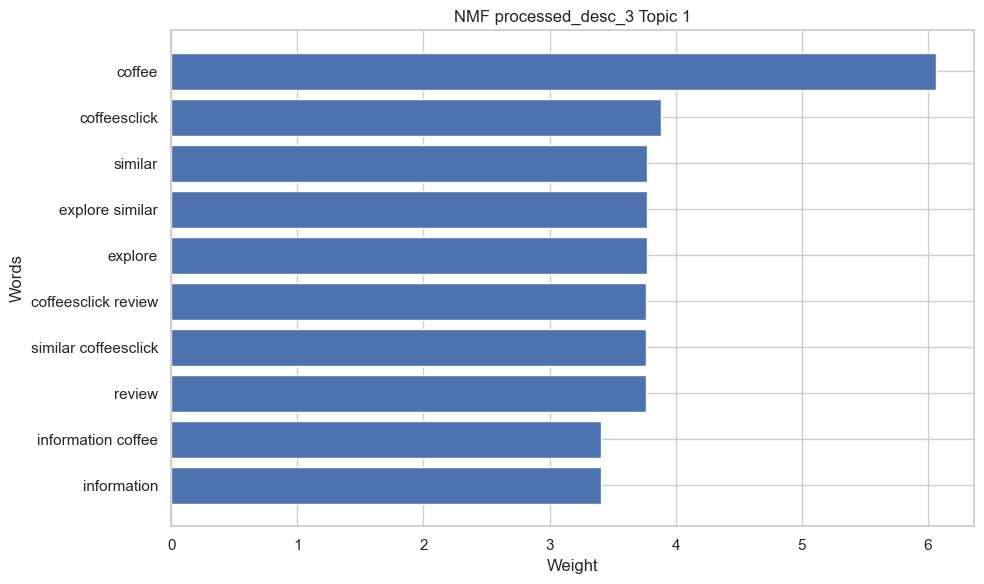

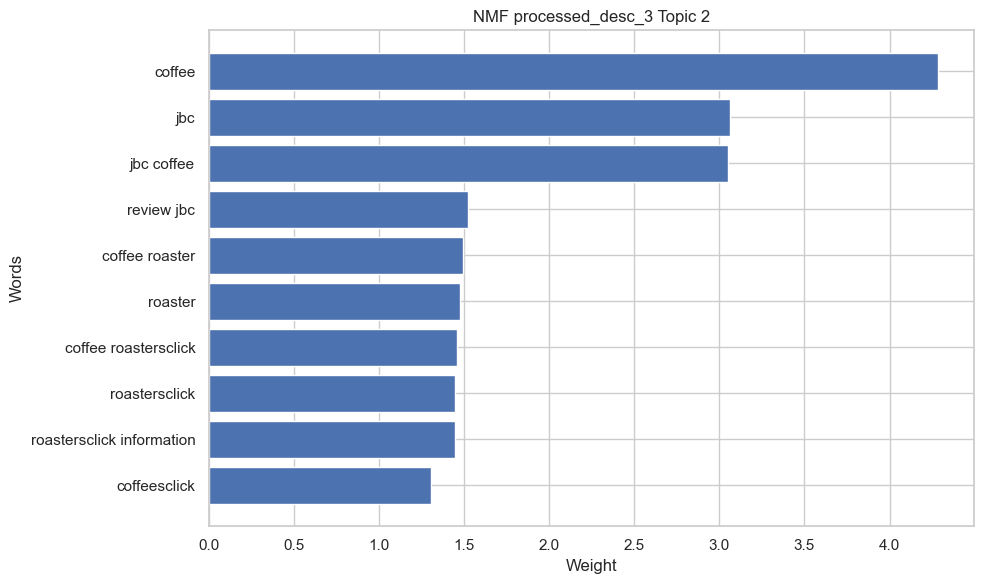

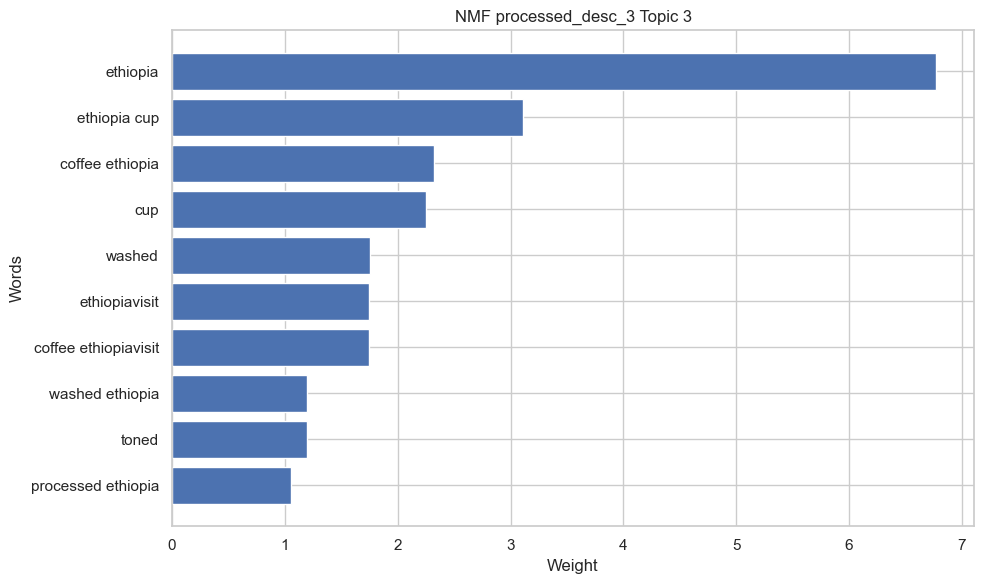

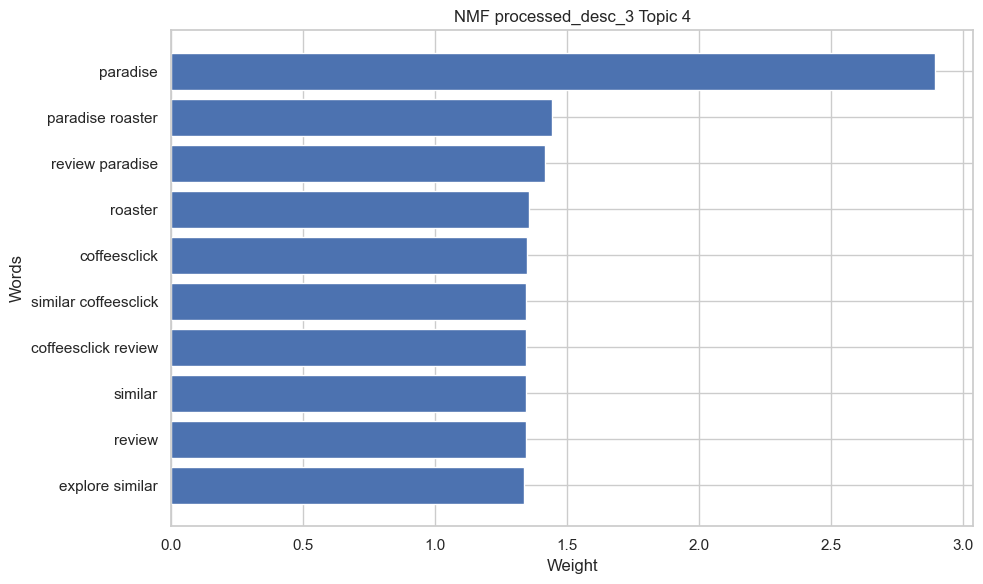

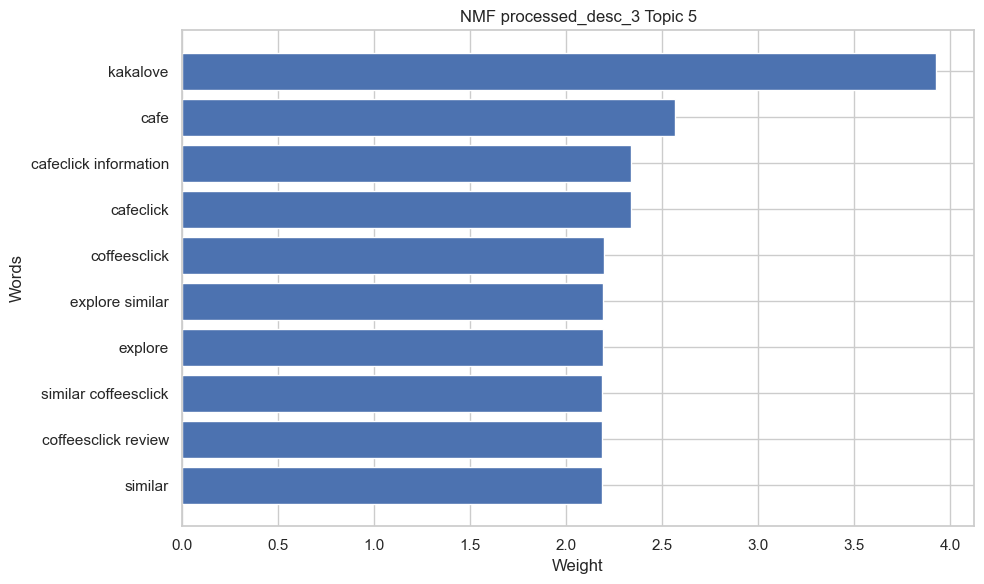

In [13]:
# Visualize Topics with Fixed Number of Topics (5)
from matplotlib import pyplot as plt

def visualize_topics_fixed(model, feature_names, num_words=10, title_prefix="", fixed_topics=5):
    """Visualize a fixed number of topics from the model."""
    for topic_idx in range(fixed_topics):
        topic = model[topic_idx]
        top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        weights = [topic[i] for i in topic.argsort()[:-num_words - 1:-1]]

        plt.figure(figsize=(10, 6))
        plt.barh(top_words[::-1], weights[::-1])  # Reverse order for better display
        plt.xlabel("Weight")
        plt.ylabel("Words")
        plt.title(f"{title_prefix}Topic {topic_idx + 1}")
        plt.tight_layout()
        plt.show()

# Visualize topics for each processed description
for col in topic_features.keys():
    print(f"Visualizing LDA topics for: {col}")
    lda_model = topic_features[col]["LDA"]["components"]
    lda_feature_names = topic_features[col]["LDA"]["names"]
    visualize_topics_fixed(lda_model, lda_feature_names, title_prefix=f"LDA {col} ", fixed_topics=5)

    print(f"Visualizing NMF topics for: {col}")
    nmf_model = topic_features[col]["NMF"]["components"]
    nmf_feature_names = topic_features[col]["NMF"]["names"]
    visualize_topics_fixed(nmf_model, nmf_feature_names, title_prefix=f"NMF {col} ", fixed_topics=5)

Generating grouped word clouds for LDA topics in: processed_desc_1


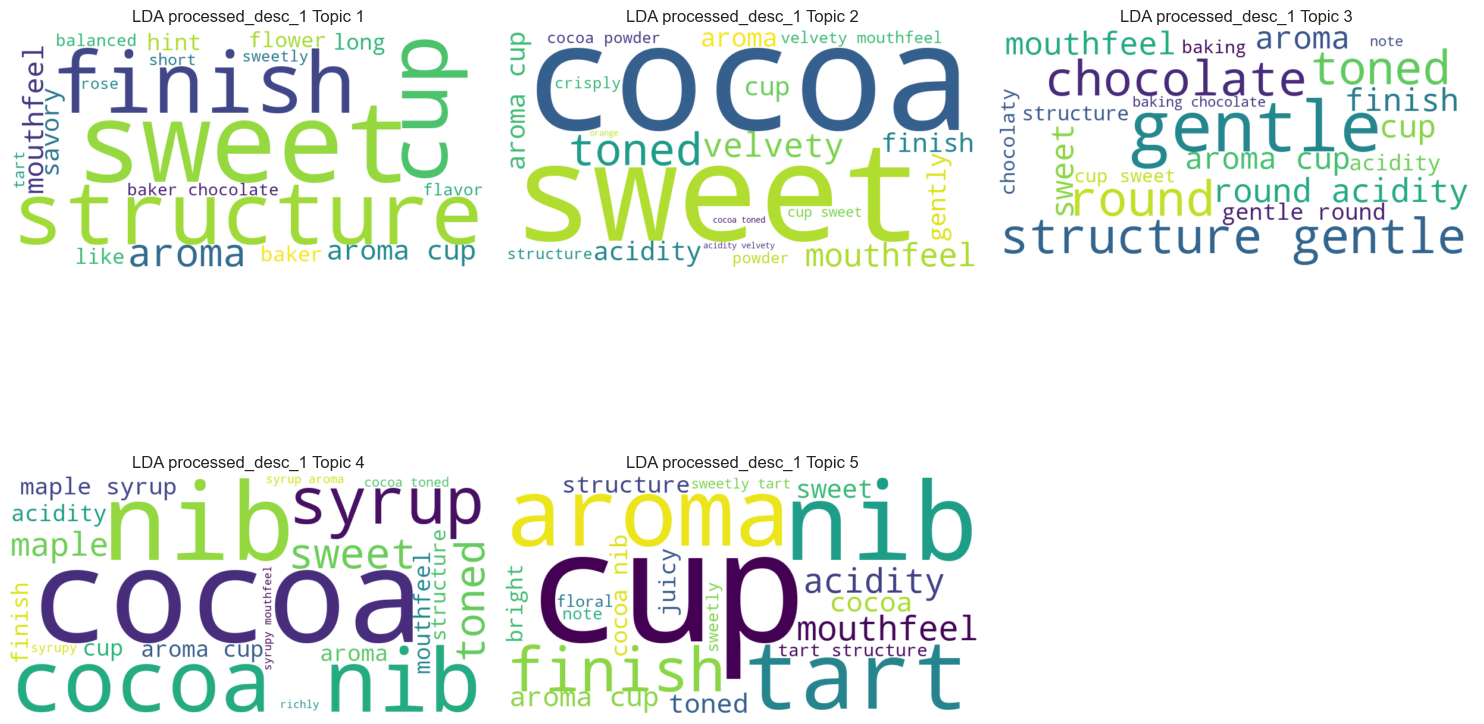

Generating grouped word clouds for NMF topics in: processed_desc_1


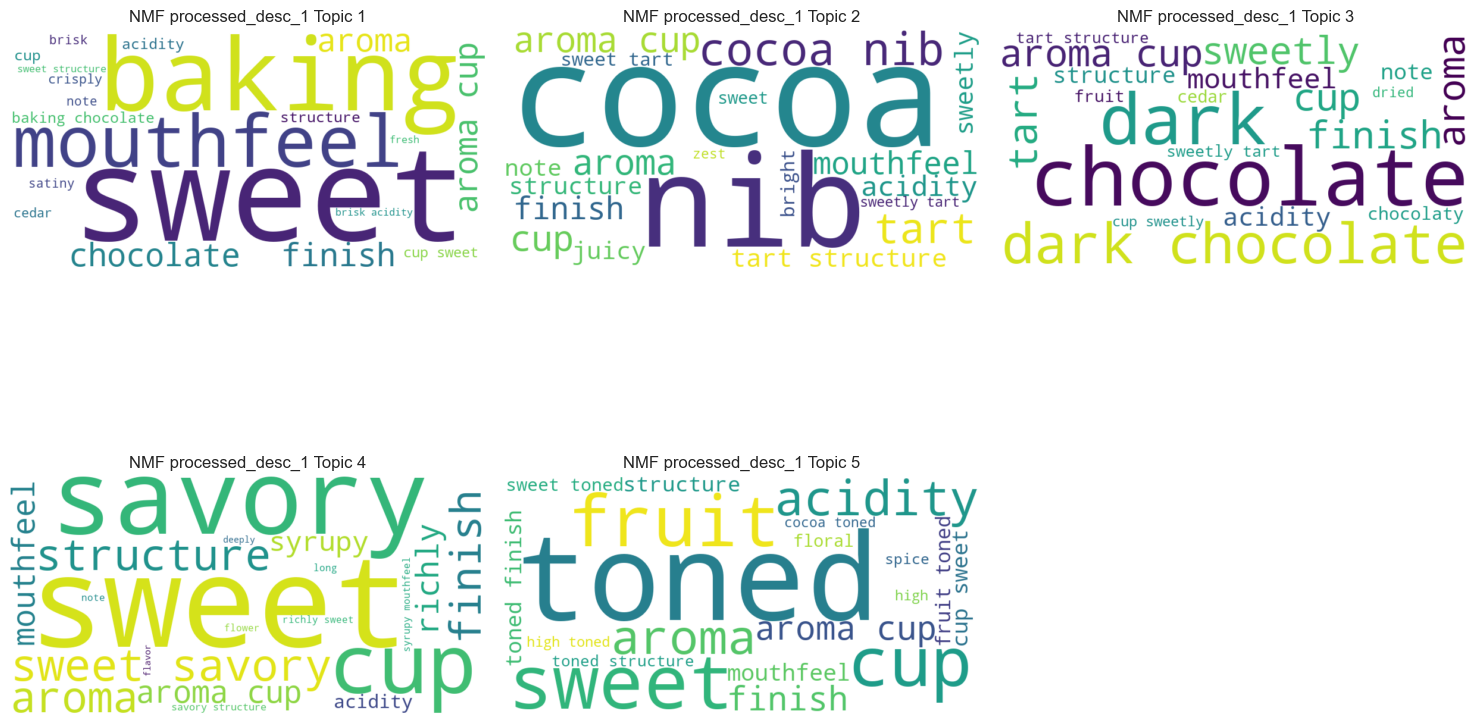

Generating grouped word clouds for LDA topics in: processed_desc_2


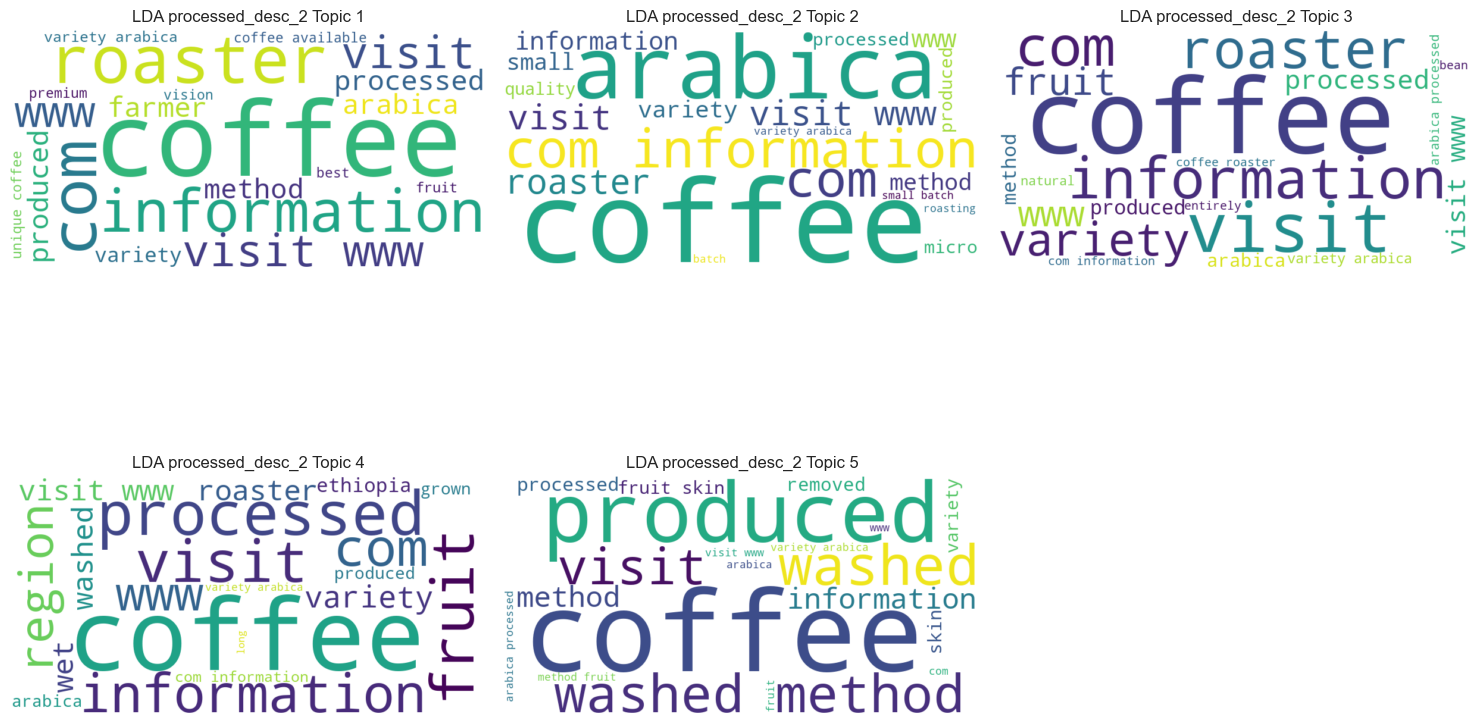

Generating grouped word clouds for NMF topics in: processed_desc_2


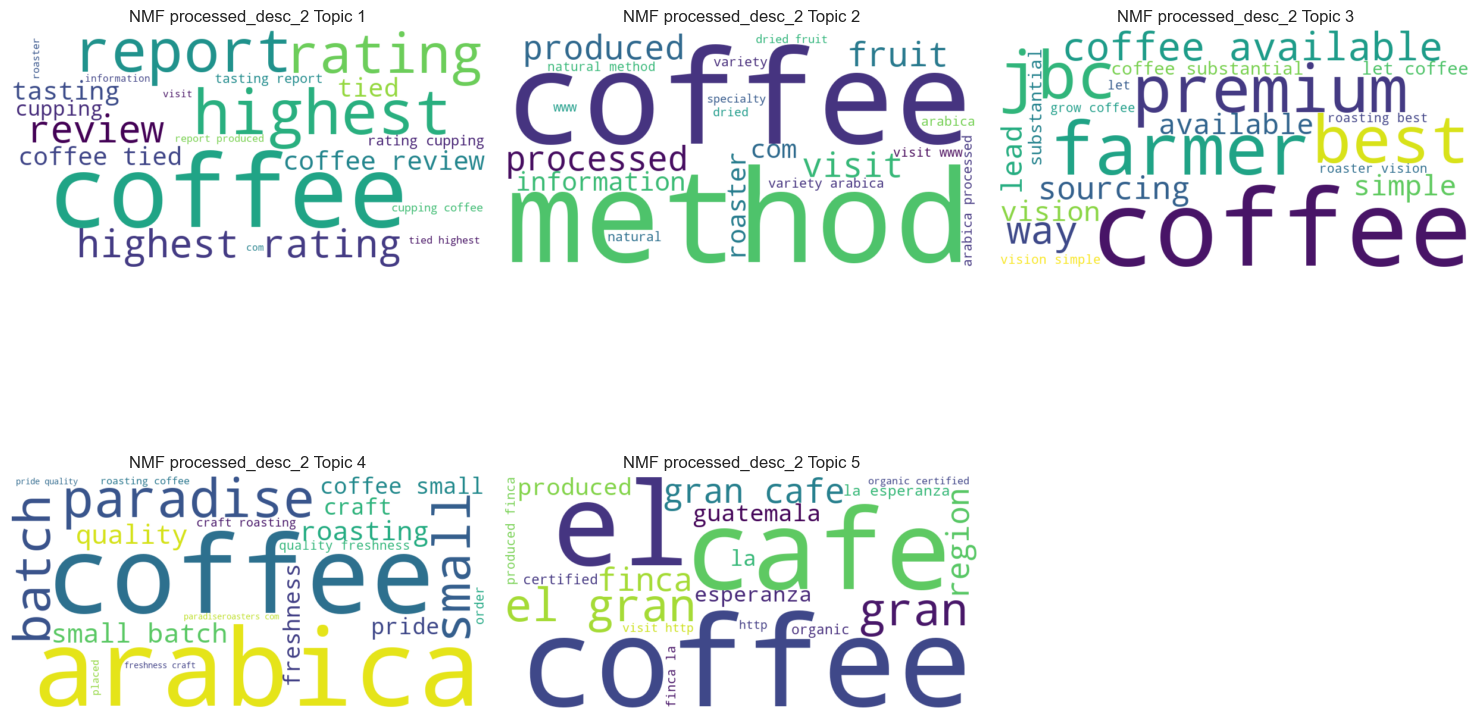

Generating grouped word clouds for LDA topics in: processed_desc_3


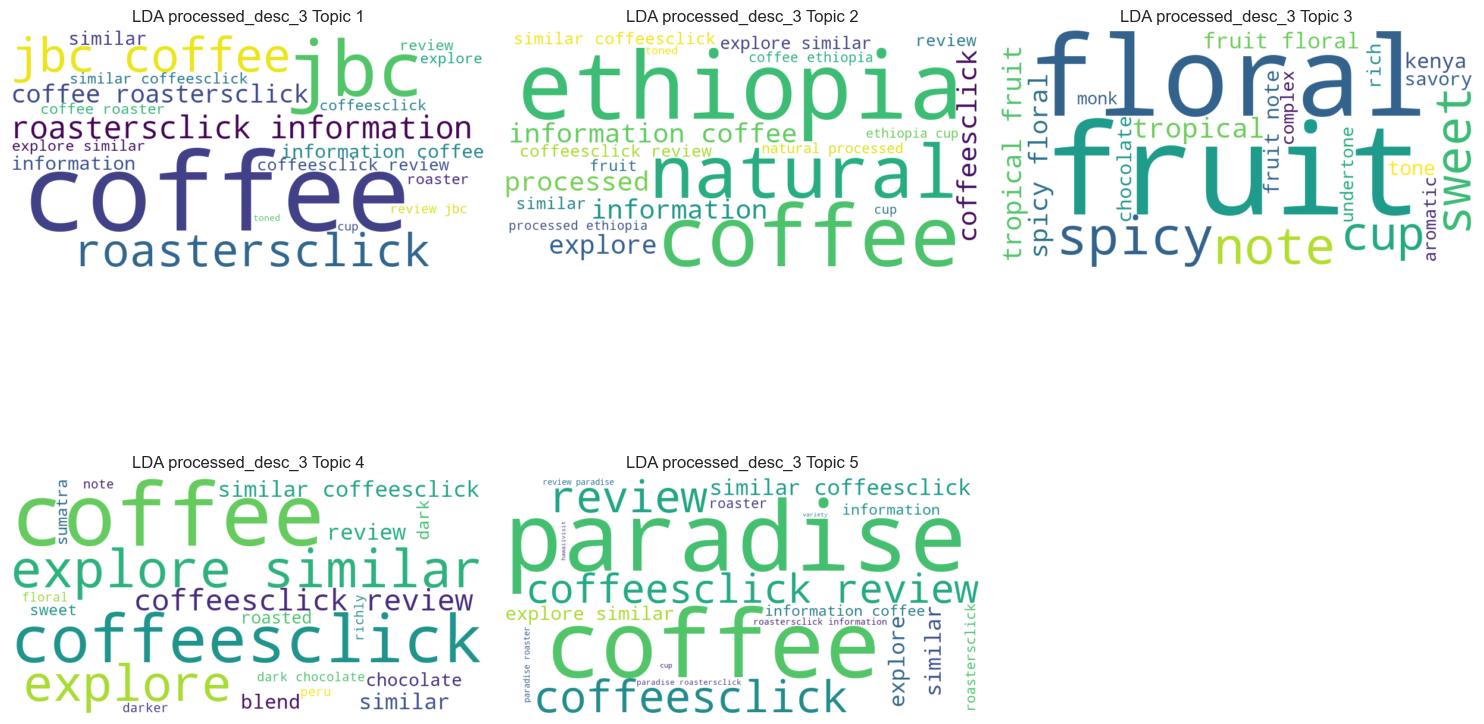

Generating grouped word clouds for NMF topics in: processed_desc_3


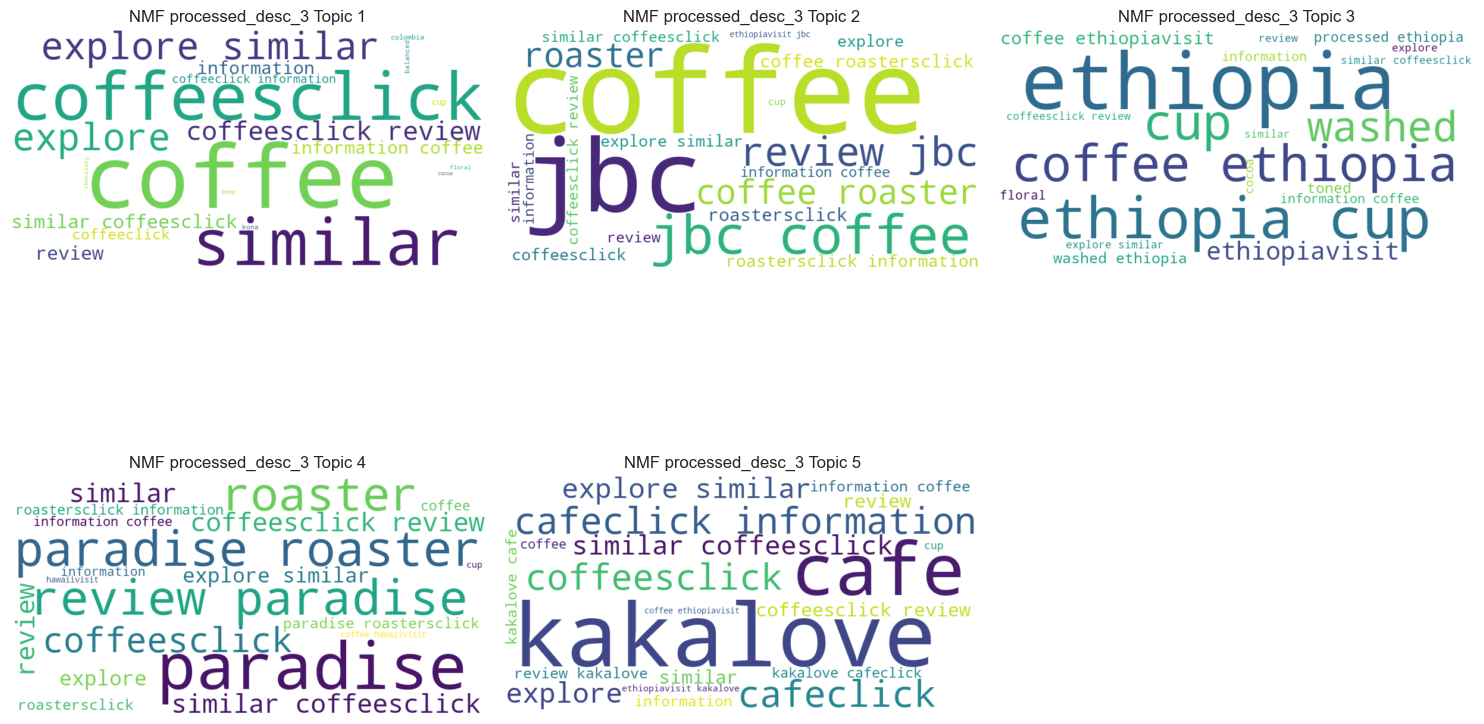

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate grouped word clouds for topics
def generate_grouped_wordclouds(components, feature_names, title_prefix="", num_topics=5, num_words=20):
    """Generates grouped word clouds for topics."""
    plt.figure(figsize=(15, 10))  # Adjust figure size as needed
    for topic_idx, topic in enumerate(components[:num_topics]):  # Limit to 'num_topics'
        # Generate top words for the topic
        top_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-num_words - 1:-1]}

        # Generate word cloud
        wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(top_words)

        # Add subplot for the word cloud
        plt.subplot(2, (num_topics + 1) // 2, topic_idx + 1)  # Arrange in 2 rows
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{title_prefix}Topic {topic_idx + 1}")

    plt.tight_layout()
    plt.show()


# Generate grouped word clouds for LDA and NMF
for col in ['processed_desc_1', 'processed_desc_2', 'processed_desc_3']:
    print(f"Generating grouped word clouds for LDA topics in: {col}")
    lda_model_components = topic_features[col]["LDA"]["components"]
    lda_feature_names = topic_features[col]["LDA"]["names"]
    generate_grouped_wordclouds(lda_model_components, lda_feature_names, title_prefix=f"LDA {col} ", num_topics=5)

    print(f"Generating grouped word clouds for NMF topics in: {col}")
    nmf_model_components = topic_features[col]["NMF"]["components"]
    nmf_feature_names = topic_features[col]["NMF"]["names"]
    generate_grouped_wordclouds(nmf_model_components, nmf_feature_names, title_prefix=f"NMF {col} ", num_topics=5)

# 3. Feature Integration

In [15]:
import polars as pl

# Define paths for feature datasets
embeddings_path = "/Users/seijas/Code/coffee-text-analytics/data/processed/embeddings.parquet"
tfidf_path = "/Users/seijas/Code/coffee-text-analytics/data/processed/tfidf_features.parquet"
cluster_labels_path = "/Users/seijas/Code/coffee-text-analytics/data/processed/cluster_labels.parquet"
sentiment_path = "/Users/seijas/Code/coffee-text-analytics/data/processed/updated_sentiment.parquet"
topic_distributions_path = "/Users/seijas/Code/coffee-text-analytics/data/processed/topic_distributions.parquet"

# Load datasets
print("Loading datasets...")
base_df = pl.read_parquet(embeddings_path)  # Use embeddings as the base dataset
tfidf_df = pl.read_parquet(tfidf_path)  # TF-IDF features
cluster_df = pl.read_parquet(cluster_labels_path)  # Cluster labels
sentiment_df = pl.read_parquet(sentiment_path)  # Sentiment features
topic_df = pl.read_parquet(topic_distributions_path)  # Topic distributions

# Merge datasets on the common 'id' column
print("Merging datasets...")
combined_df = base_df.join(tfidf_df, how="left")  # Merge TF-IDF
combined_df = combined_df.join(cluster_df, how="left")  # Merge cluster labels
combined_df = combined_df.join(sentiment_df, how="left")  # Merge sentiment features
combined_df = combined_df.join(topic_df, how="left")  # Merge topic distributions

# Inspect the merged dataset
print(f"Combined dataset shape: {combined_df.shape}")
print(combined_df.head())

# Save the merged dataset
output_path = "/Users/seijas/Code/coffee-text-analytics/data/processed/combined_features.parquet"
combined_df.write_parquet(output_path)
print(f"Merged dataset saved to: {output_path}")

Loading datasets...


FileNotFoundError: No such file or directory (os error 2): /Users/seijas/Code/coffee-text-analytics/data/processed/cluster_labels.parquet